# Dataset information

****importing essential libraries****

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib

**Loading the dataset**

In [196]:
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")

**looking at the dataset**

In [197]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [198]:
df.info() # checking the dtypes detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**check duplicated**

In [199]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


**Missing Values**

In [200]:
df.isna().sum() #number of missing values for each feature

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**description of the dataset** 

In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


**detecting outliers**

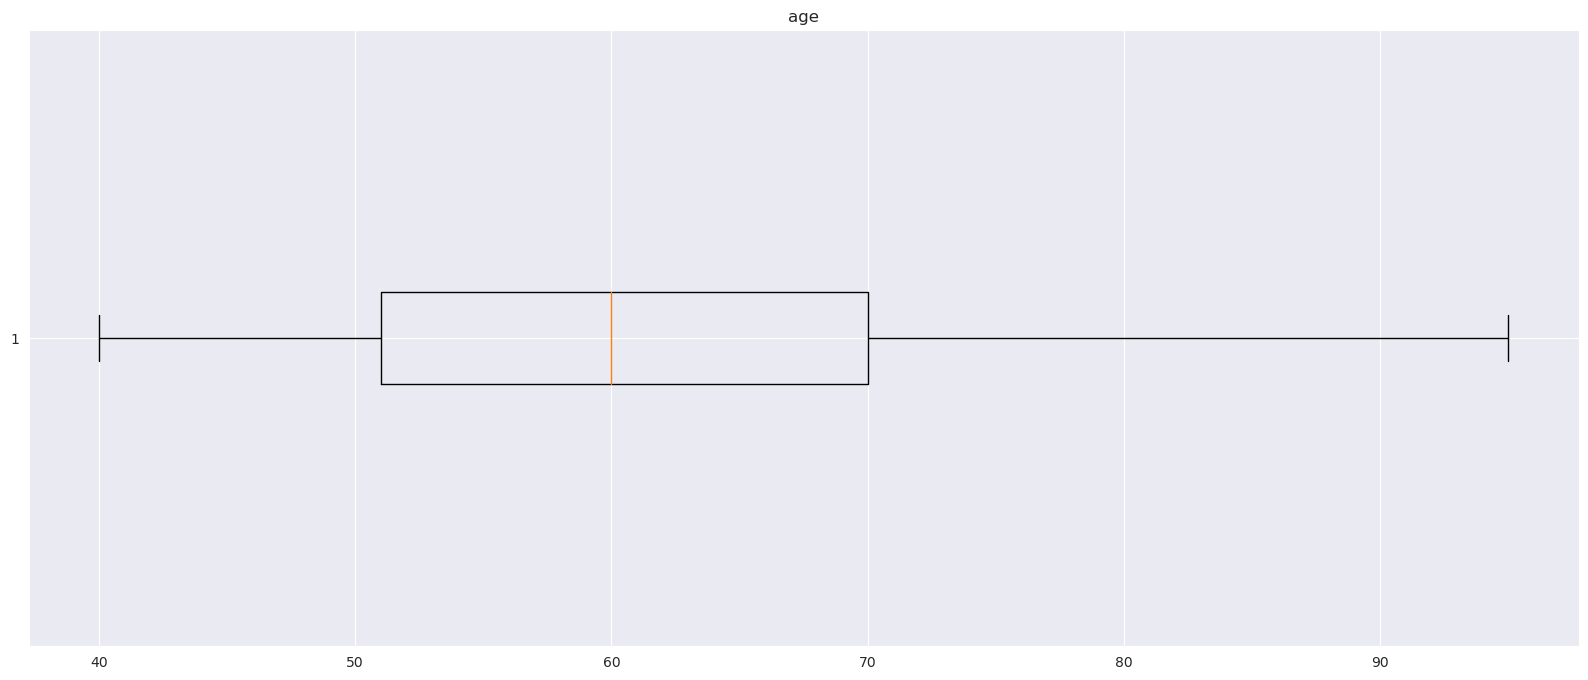

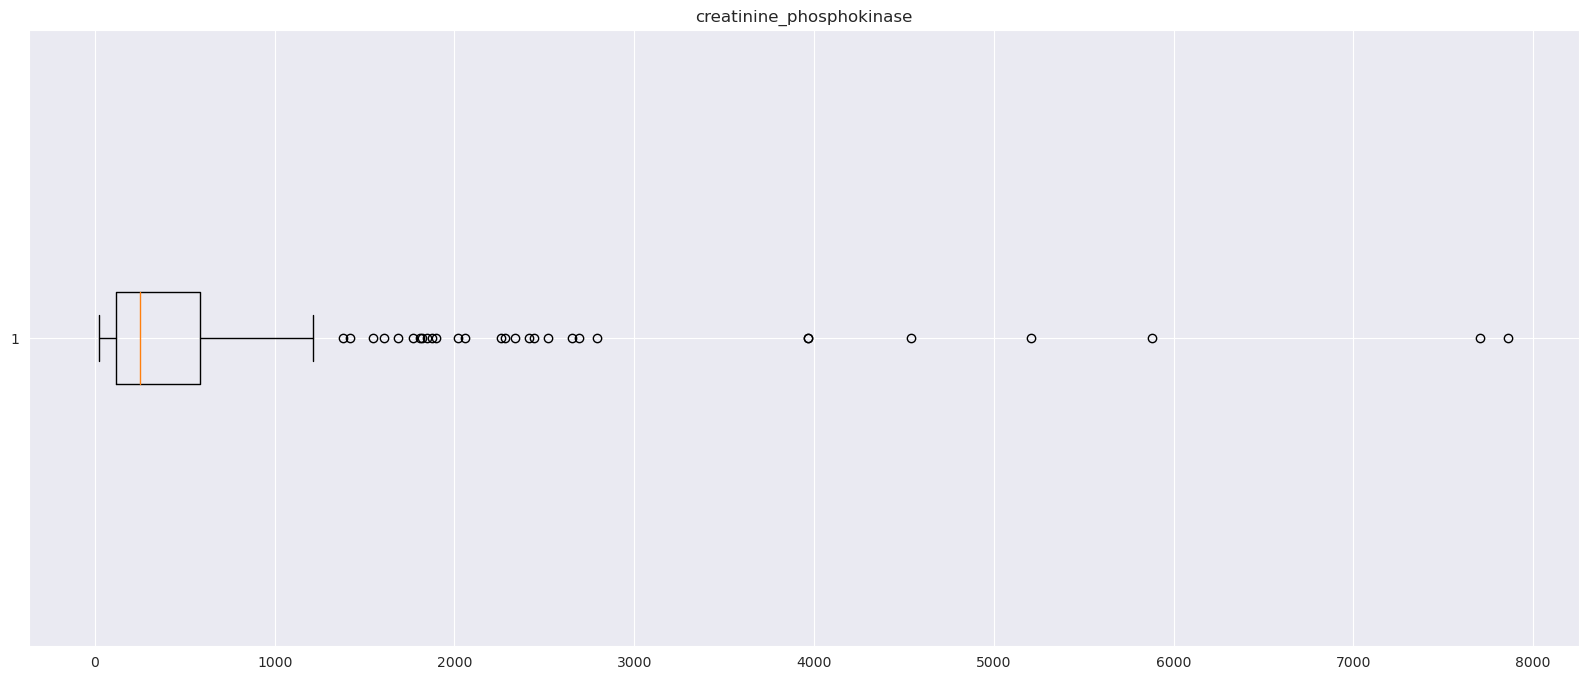

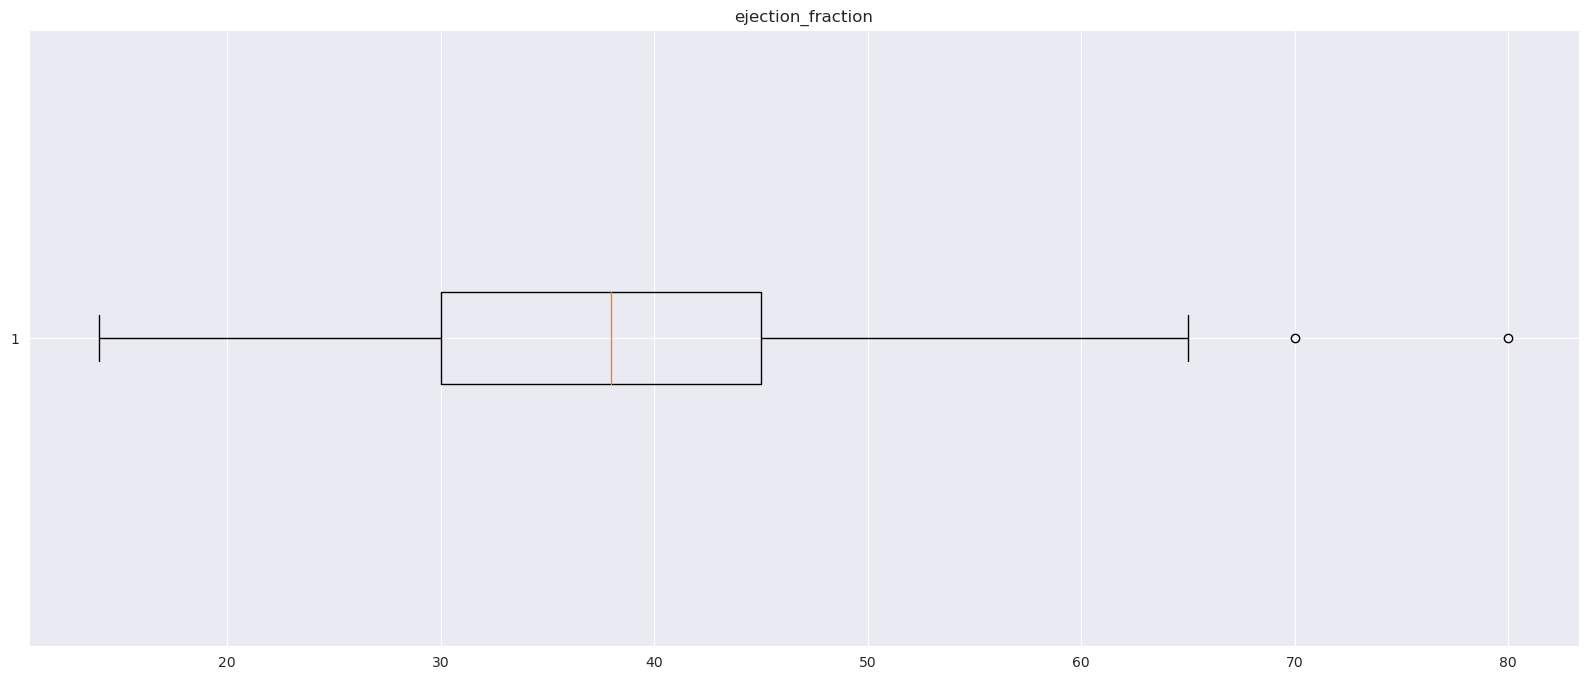

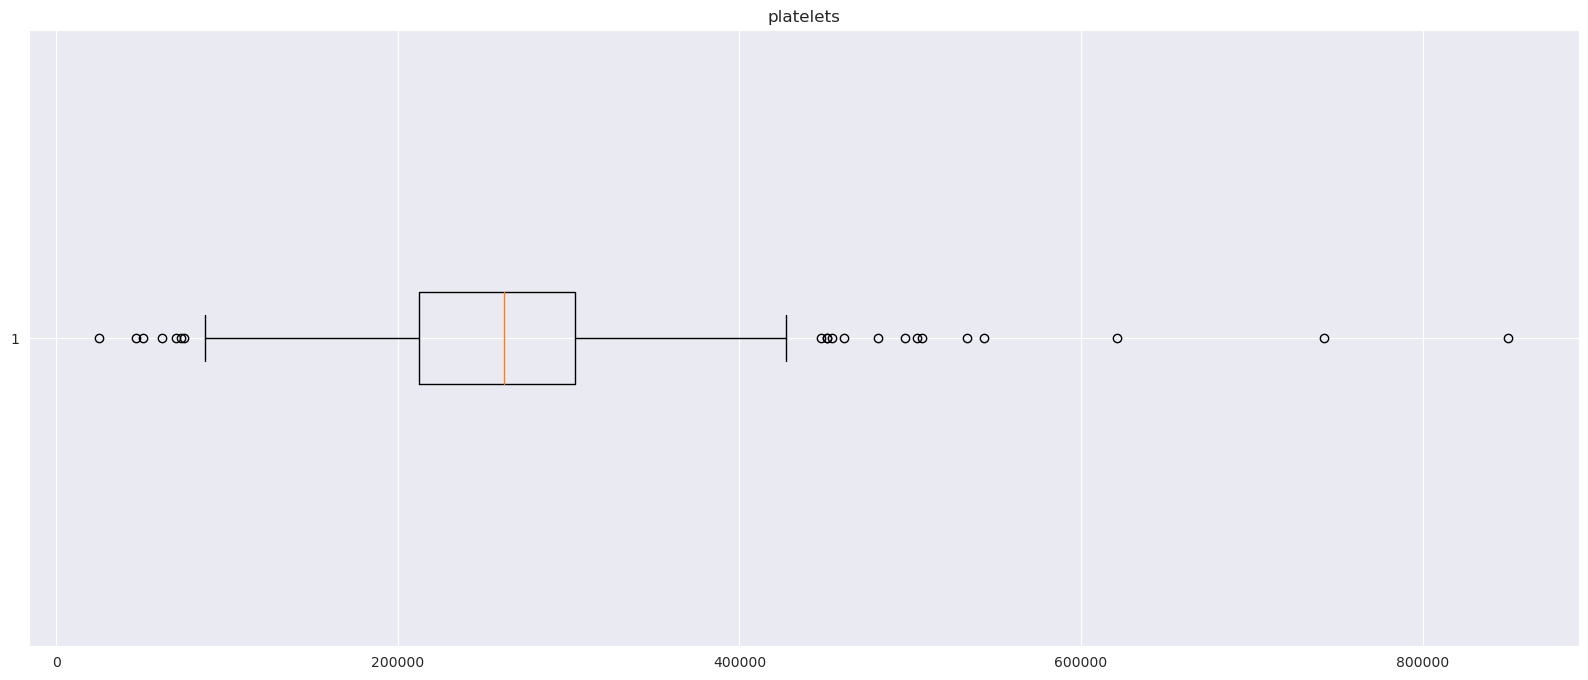

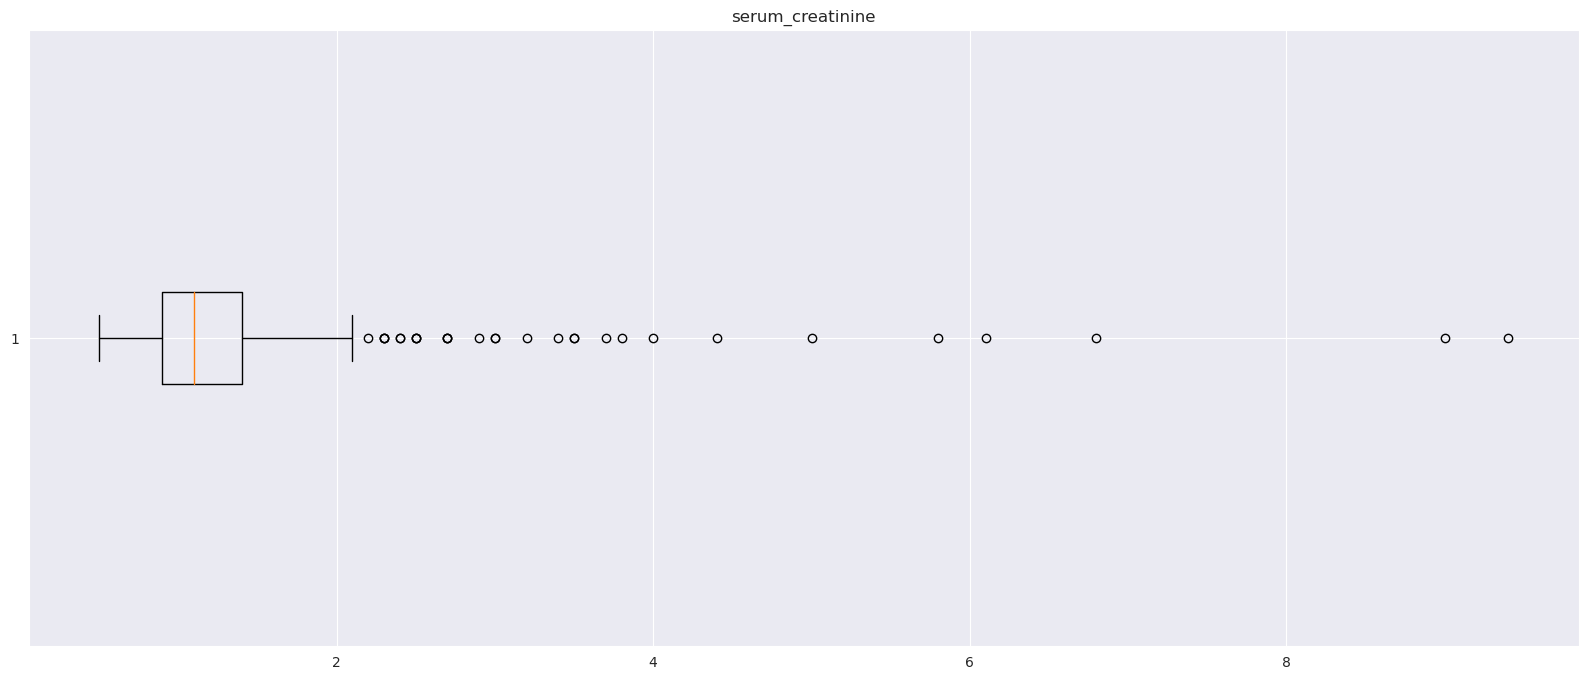

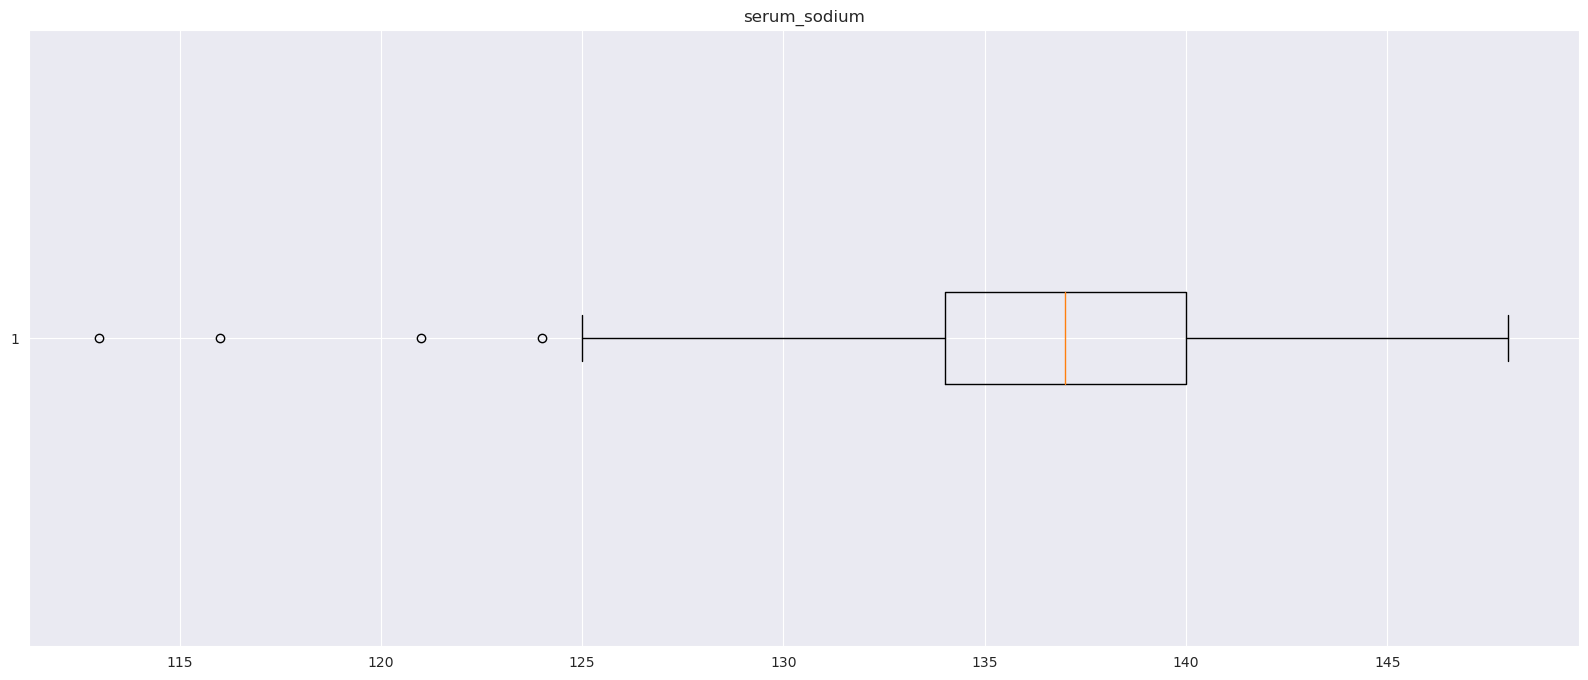

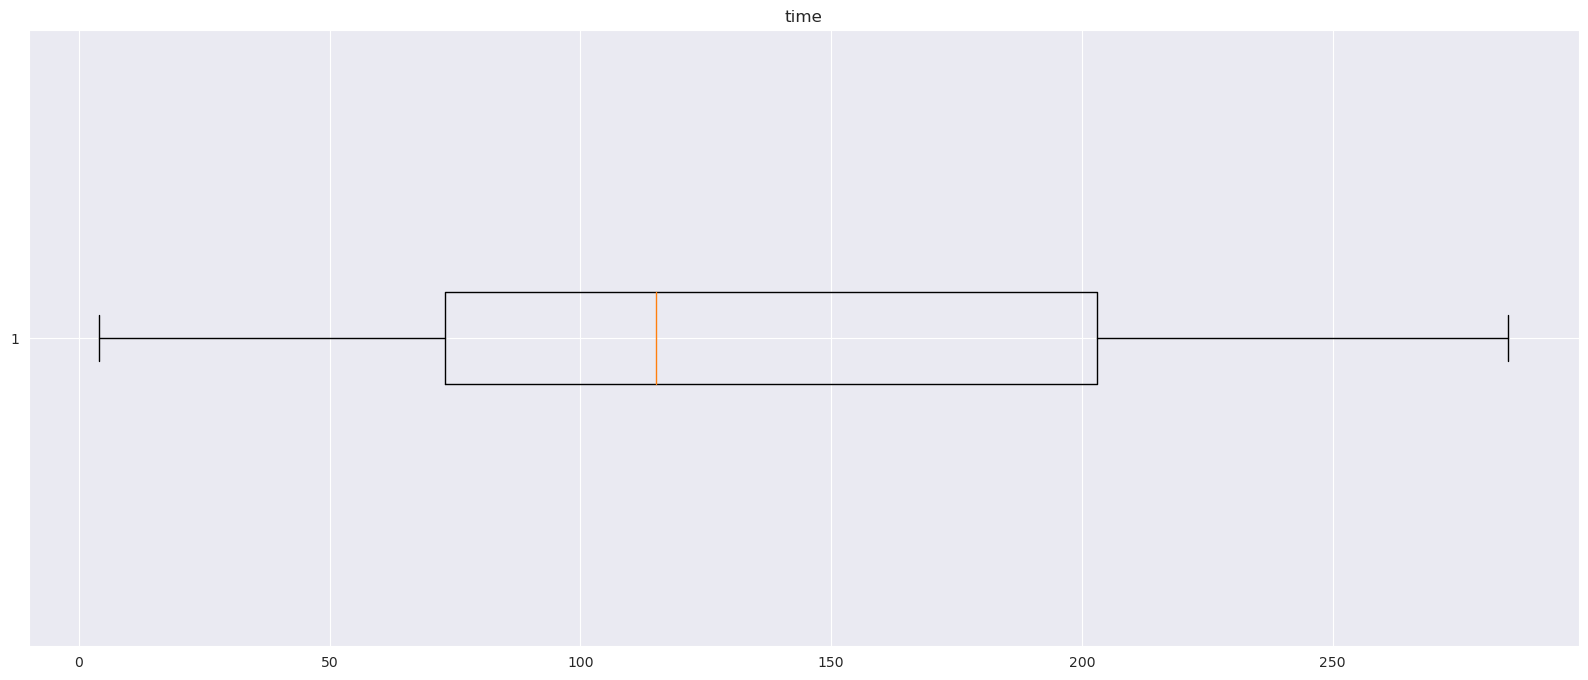

In [202]:
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

**distribution of features**

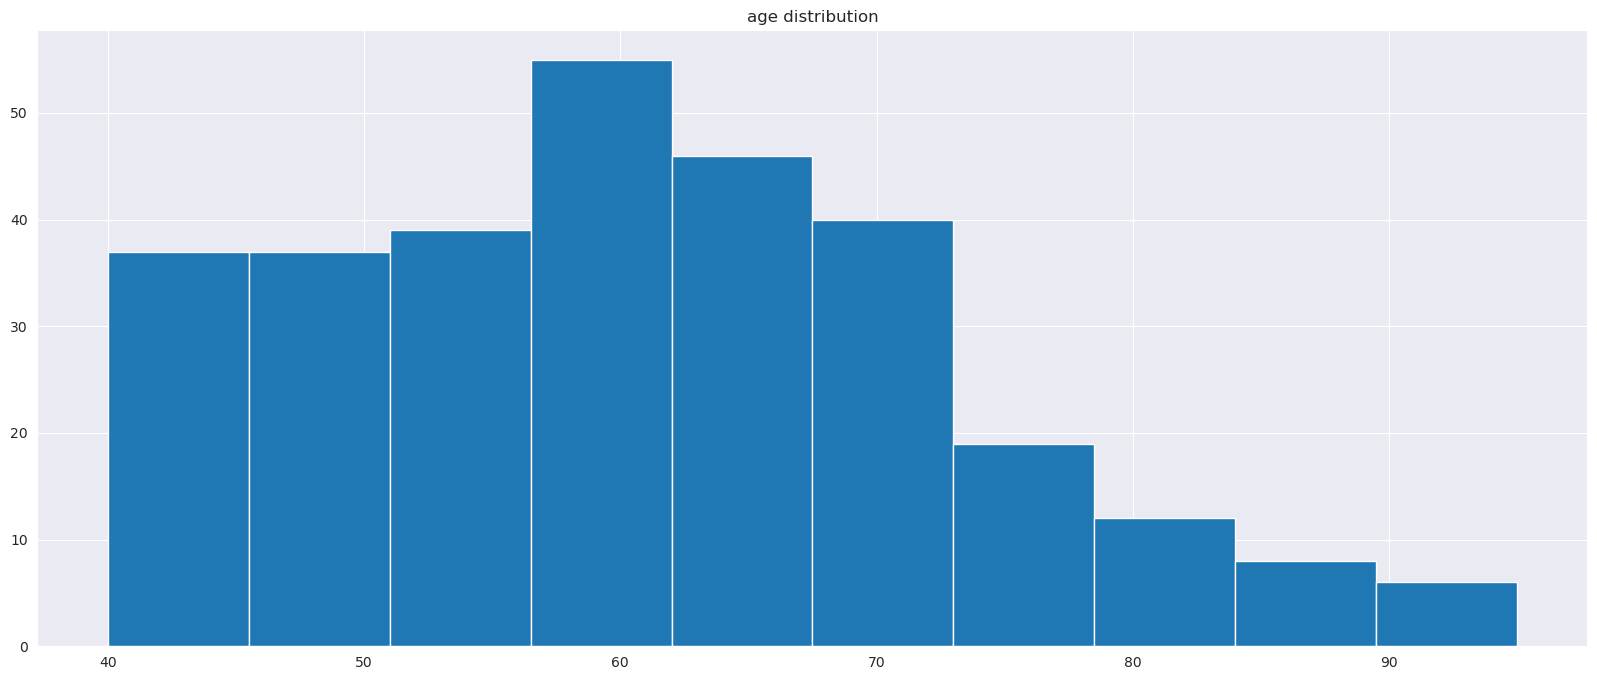

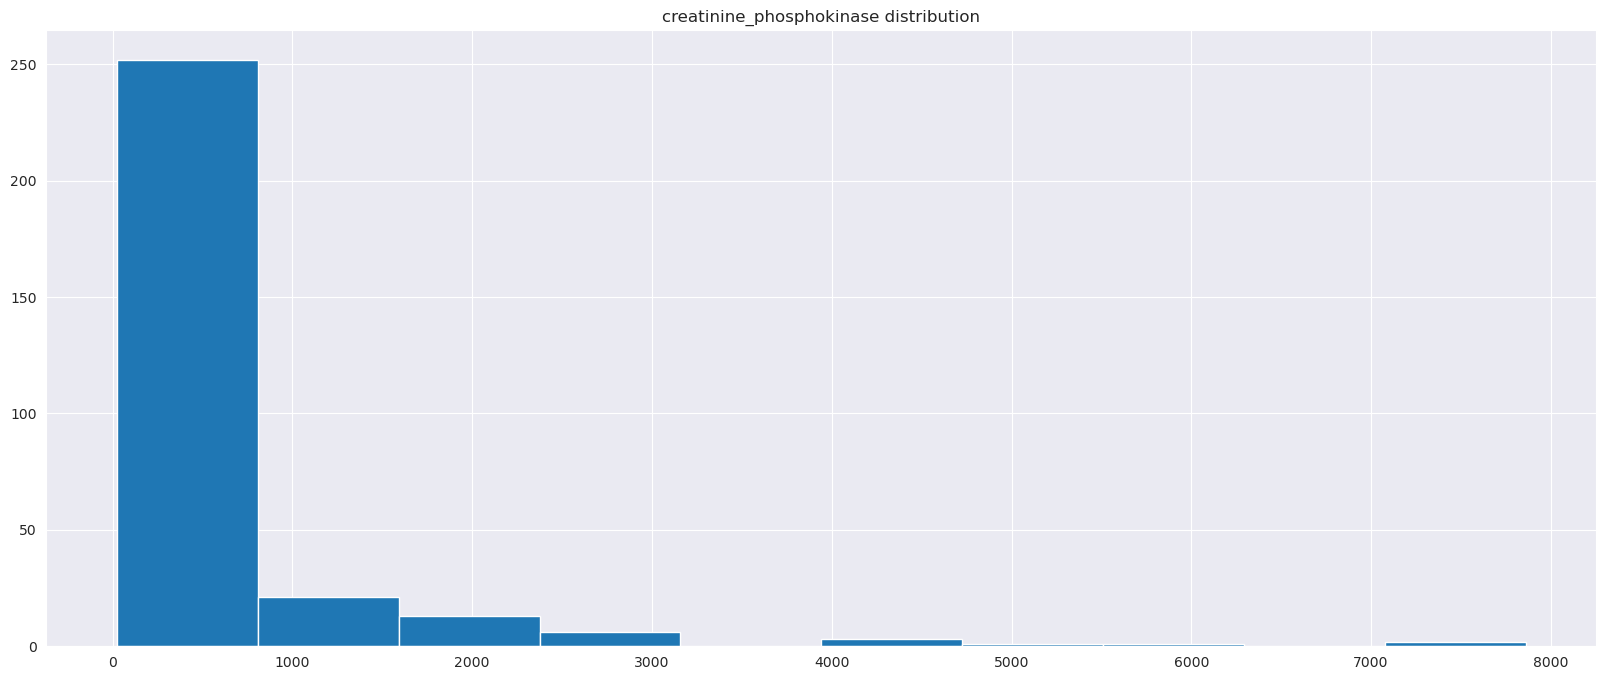

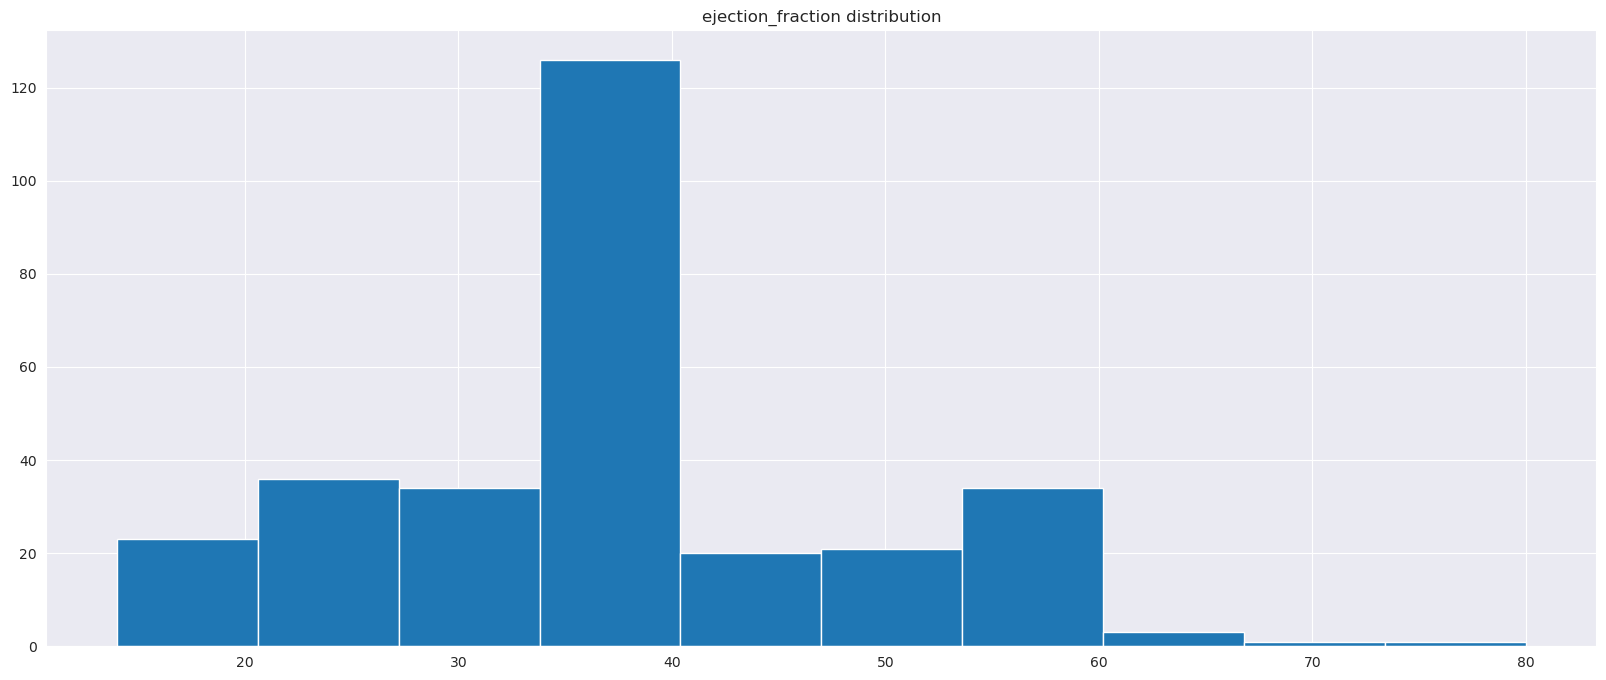

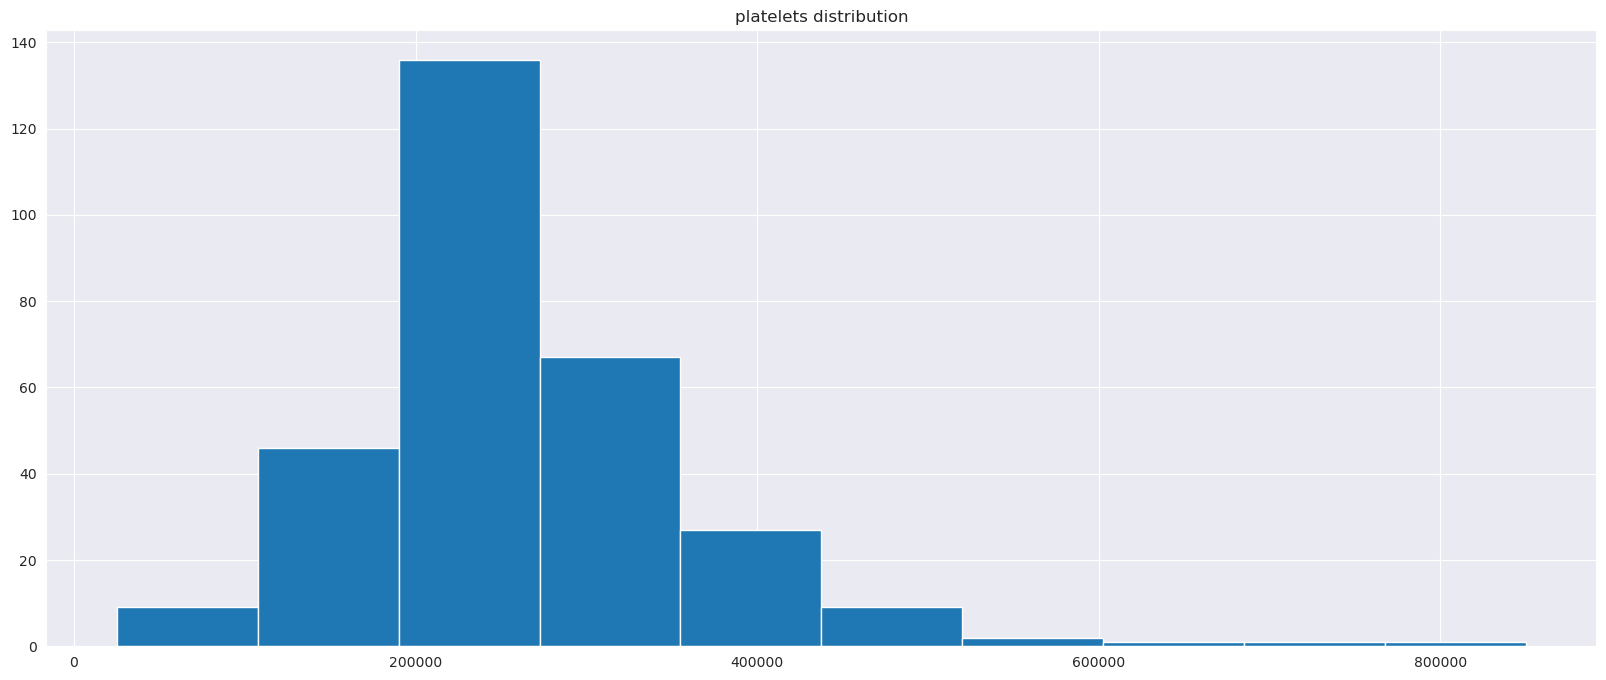

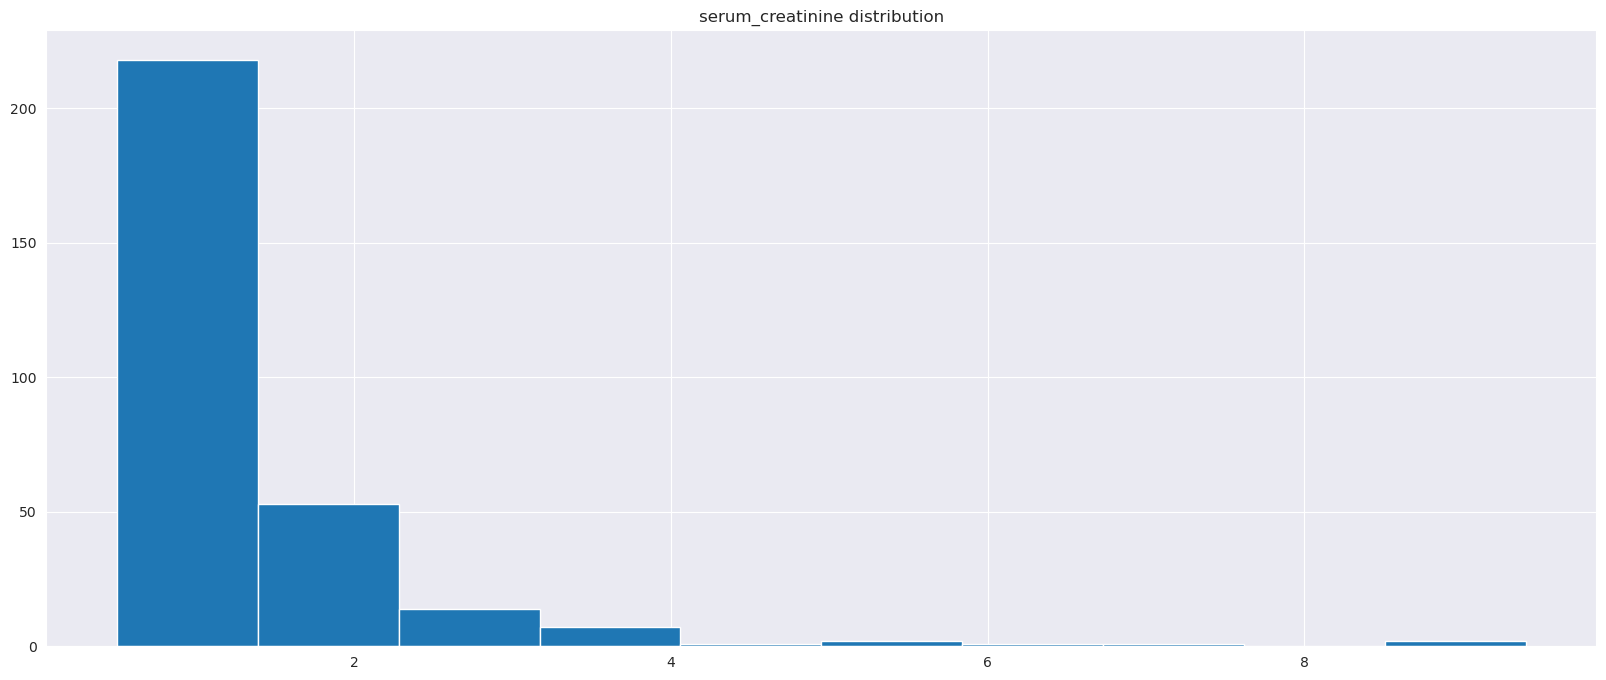

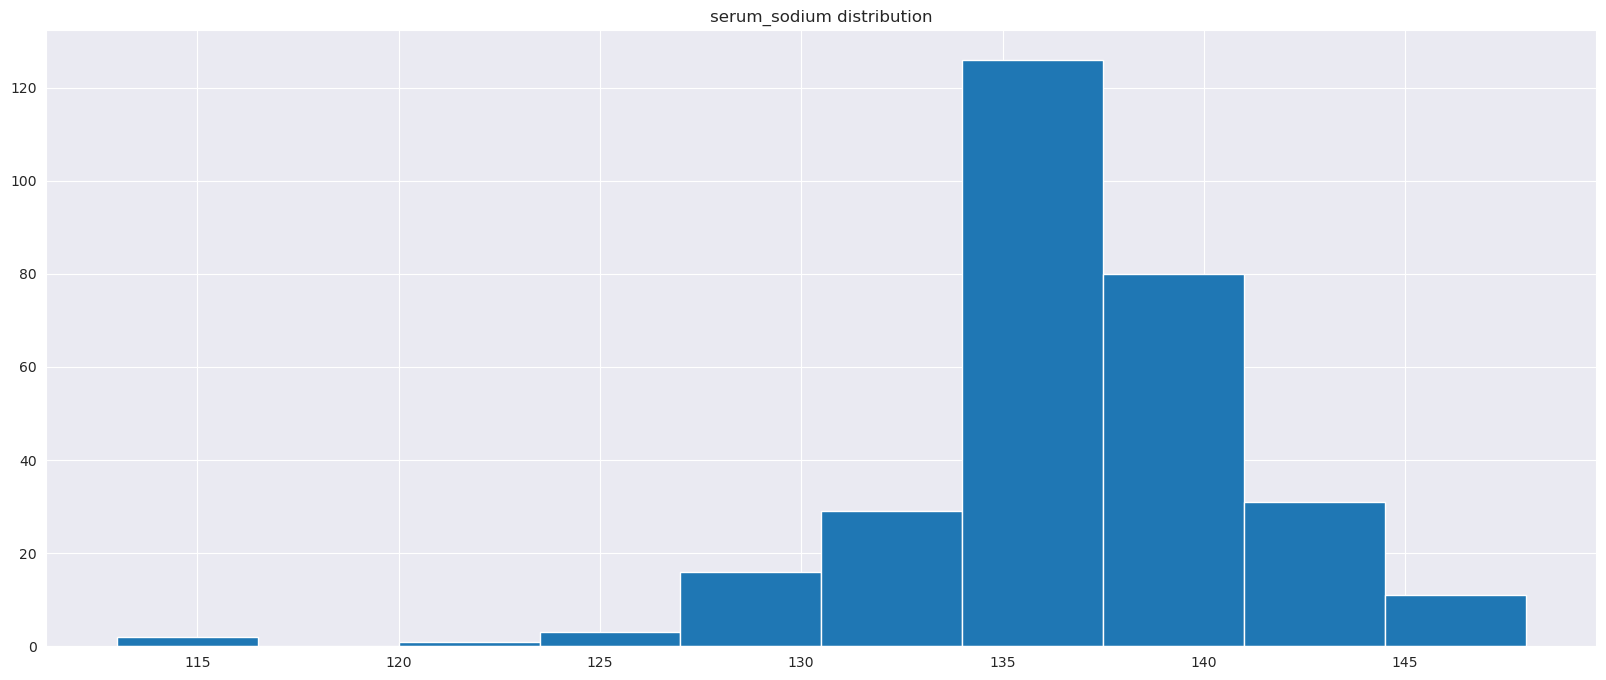

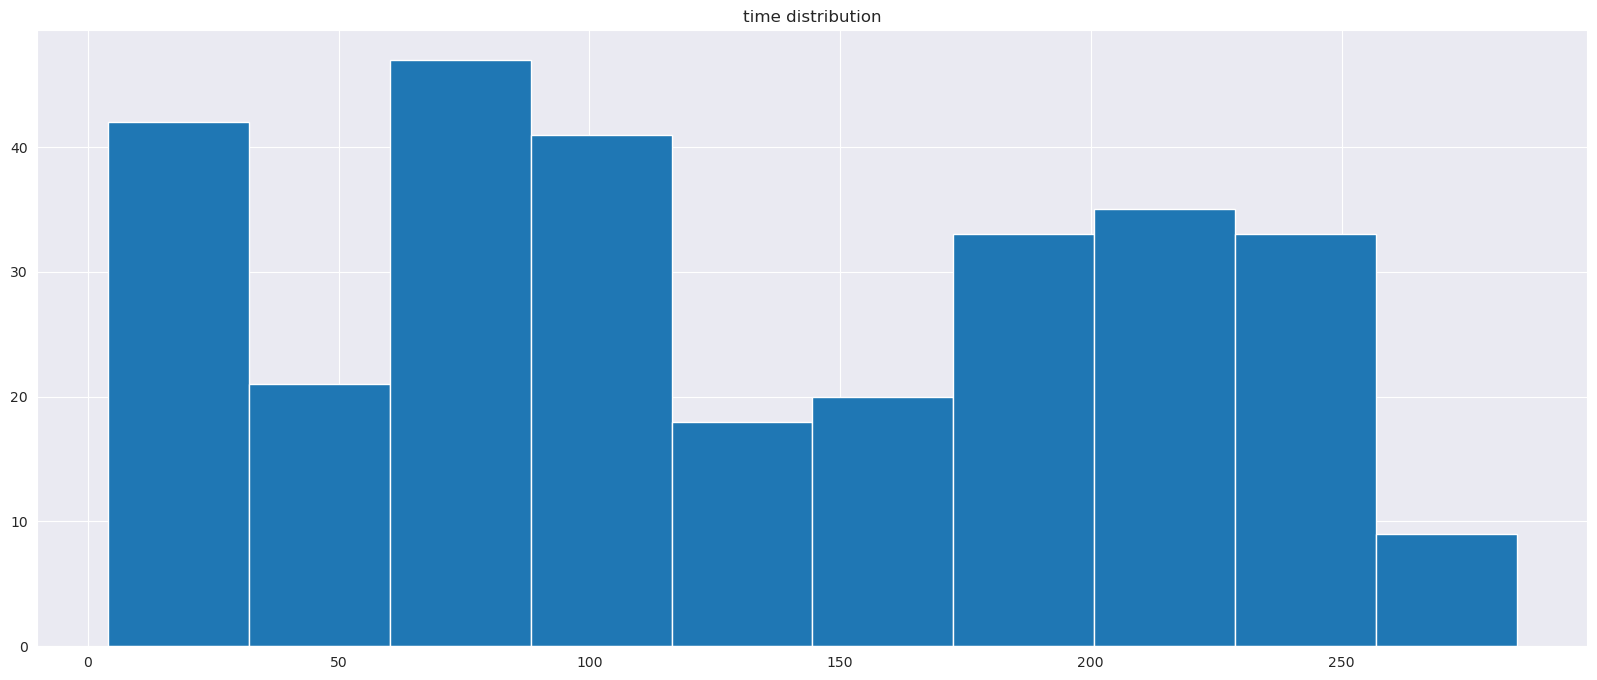

In [203]:
# distribution of numerical features

for i in numerical:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

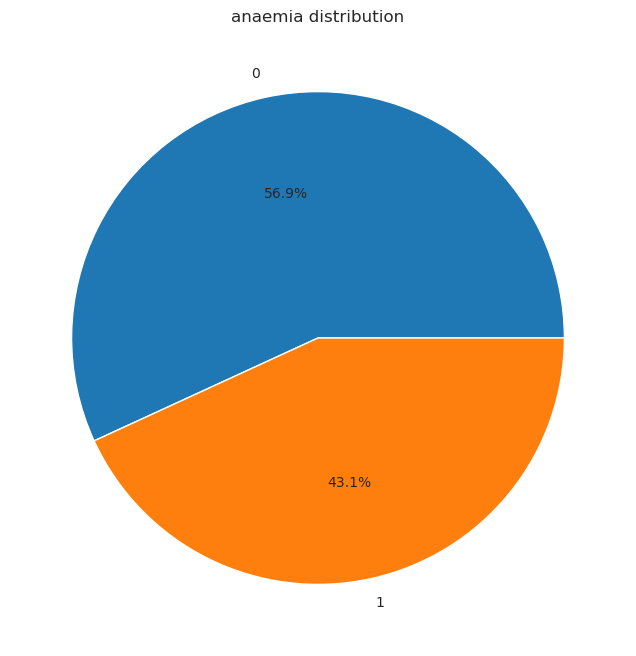

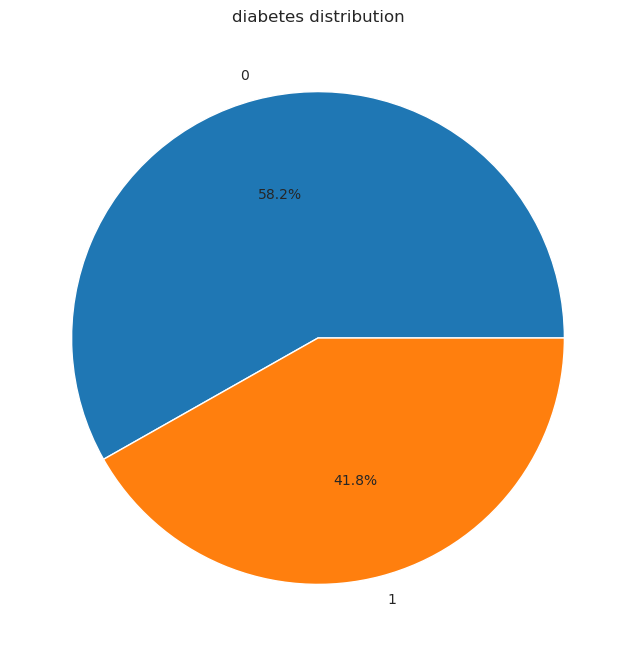

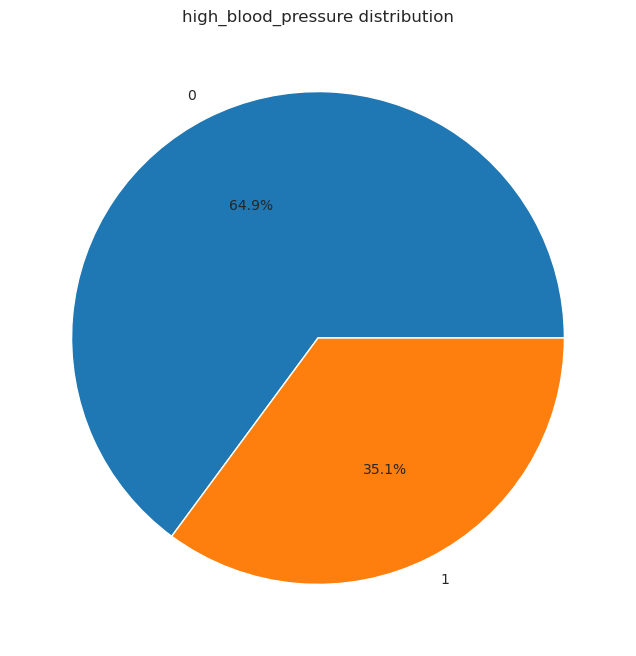

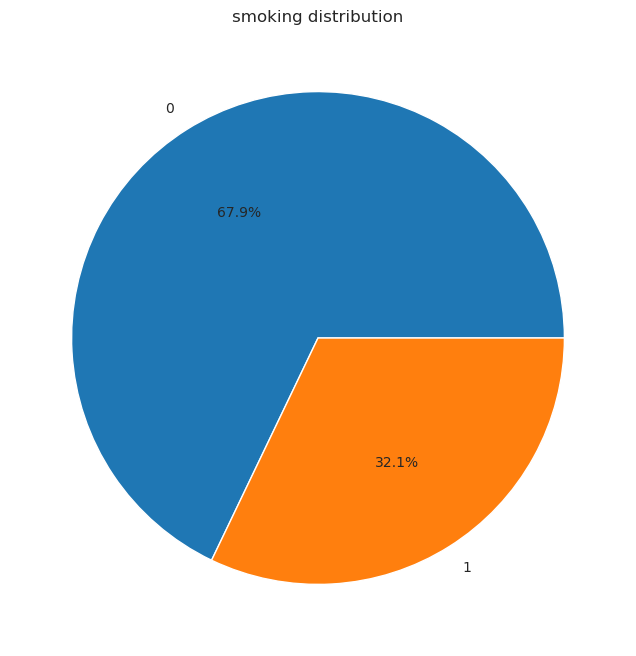

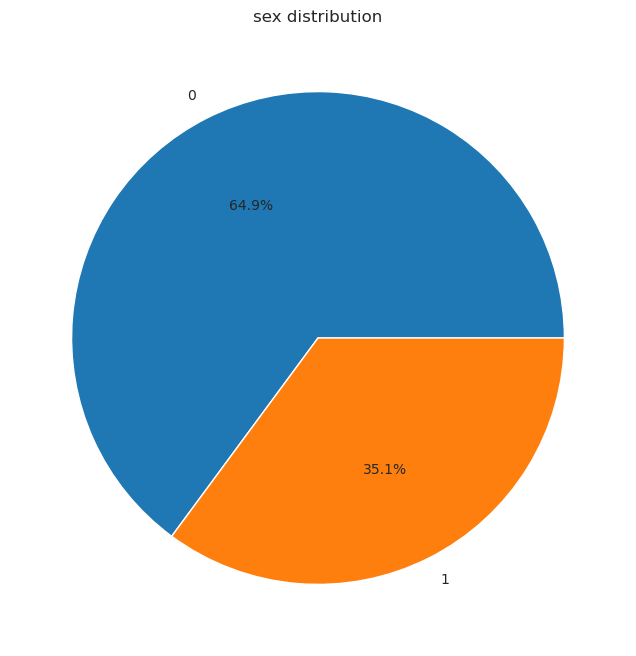

In [204]:
# distribution of categorical features

categorical_features= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

for i in categorical_features:
    plt.pie(df[i].value_counts(), autopct='%1.1f%%', labels=[0,1])
    plt.title(i + ' distribution')
    plt.show()

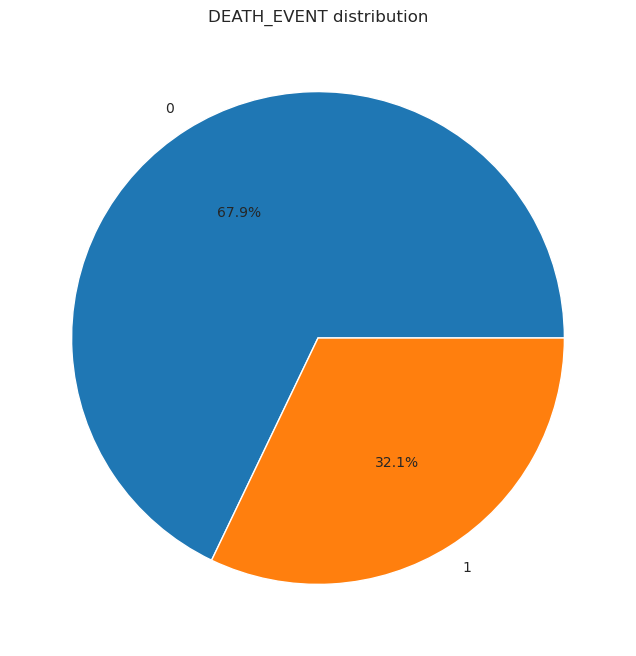

In [205]:
# distribution of target variable

plt.pie(df['DEATH_EVENT'].value_counts(), autopct='%1.1f%%', labels=[0,1])
plt.title( 'DEATH_EVENT distribution')
plt.show()


# Exploratory Data Analysis

**numerical features VS target feature**

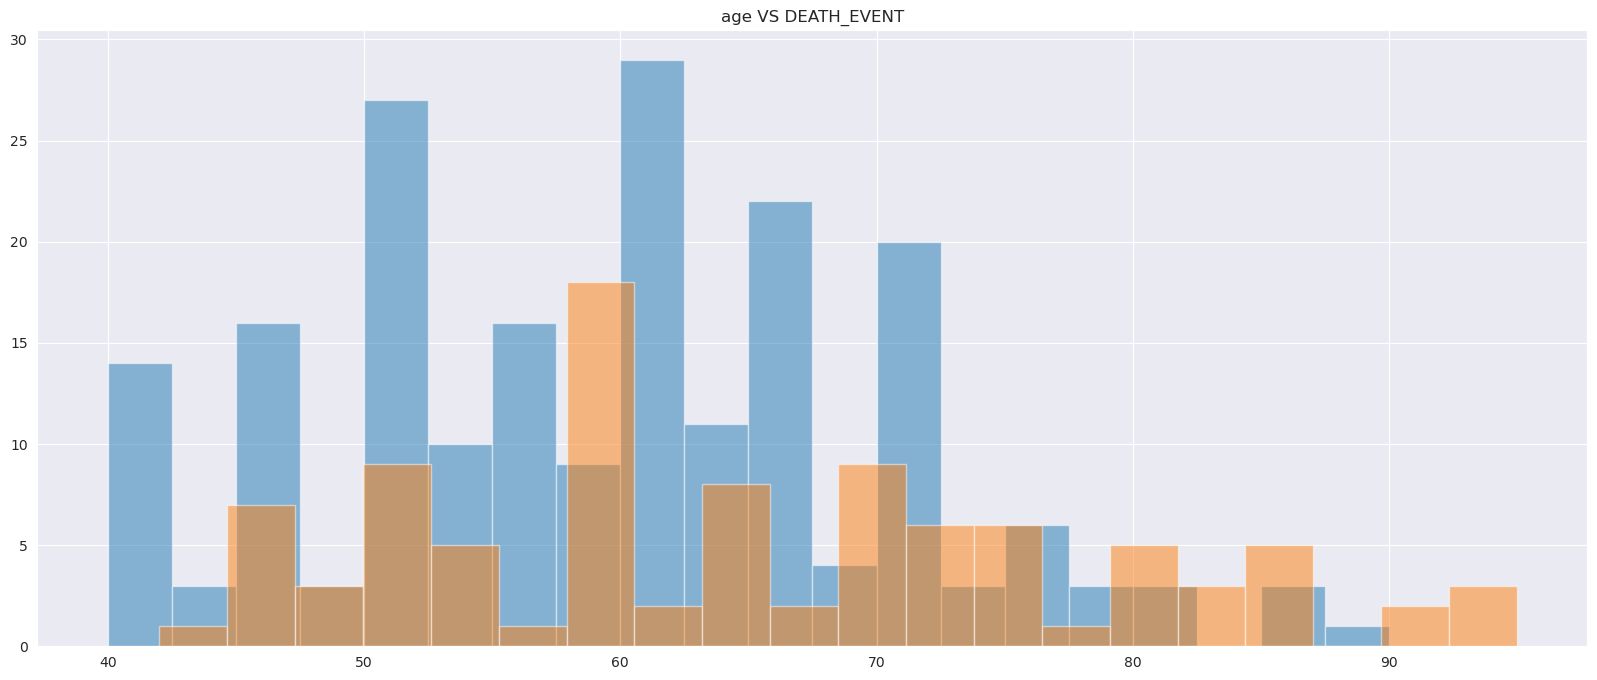

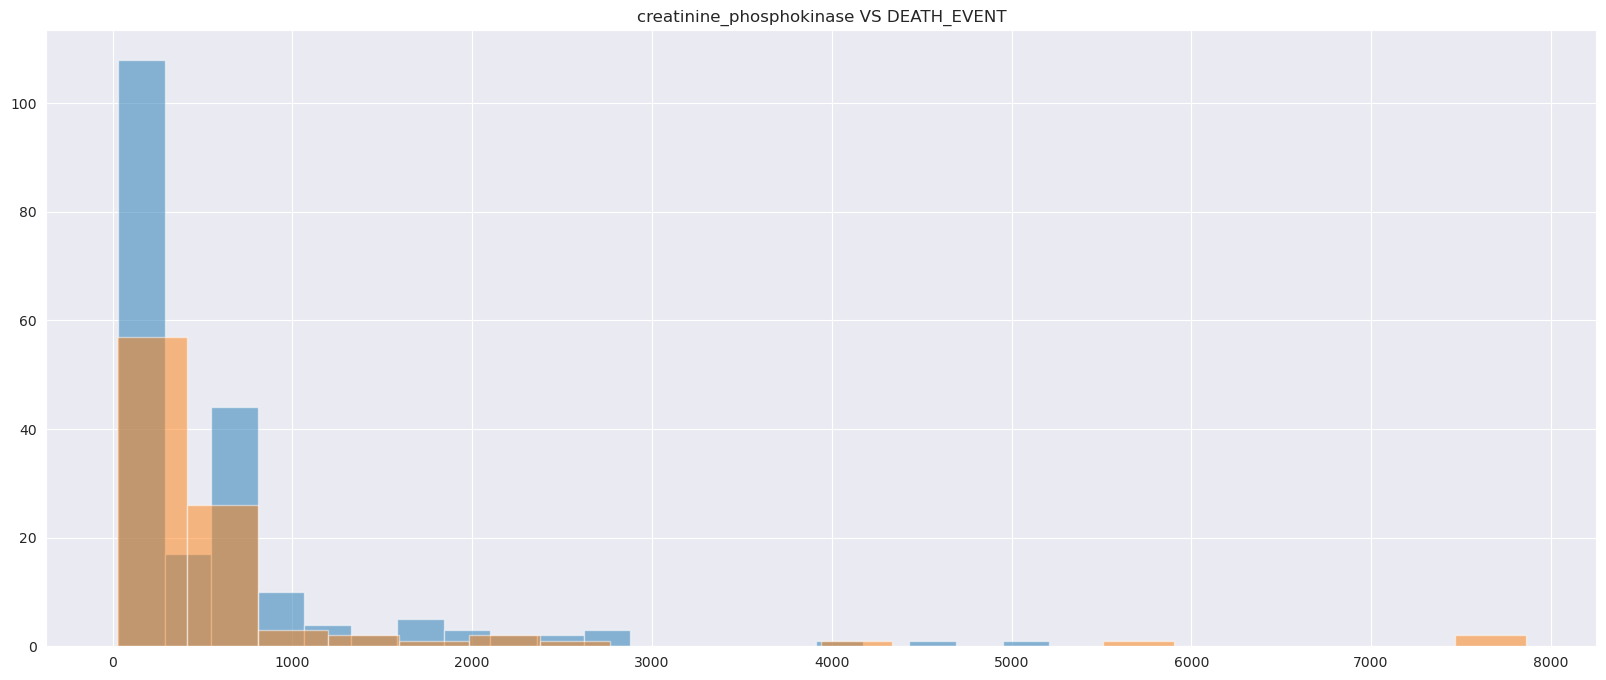

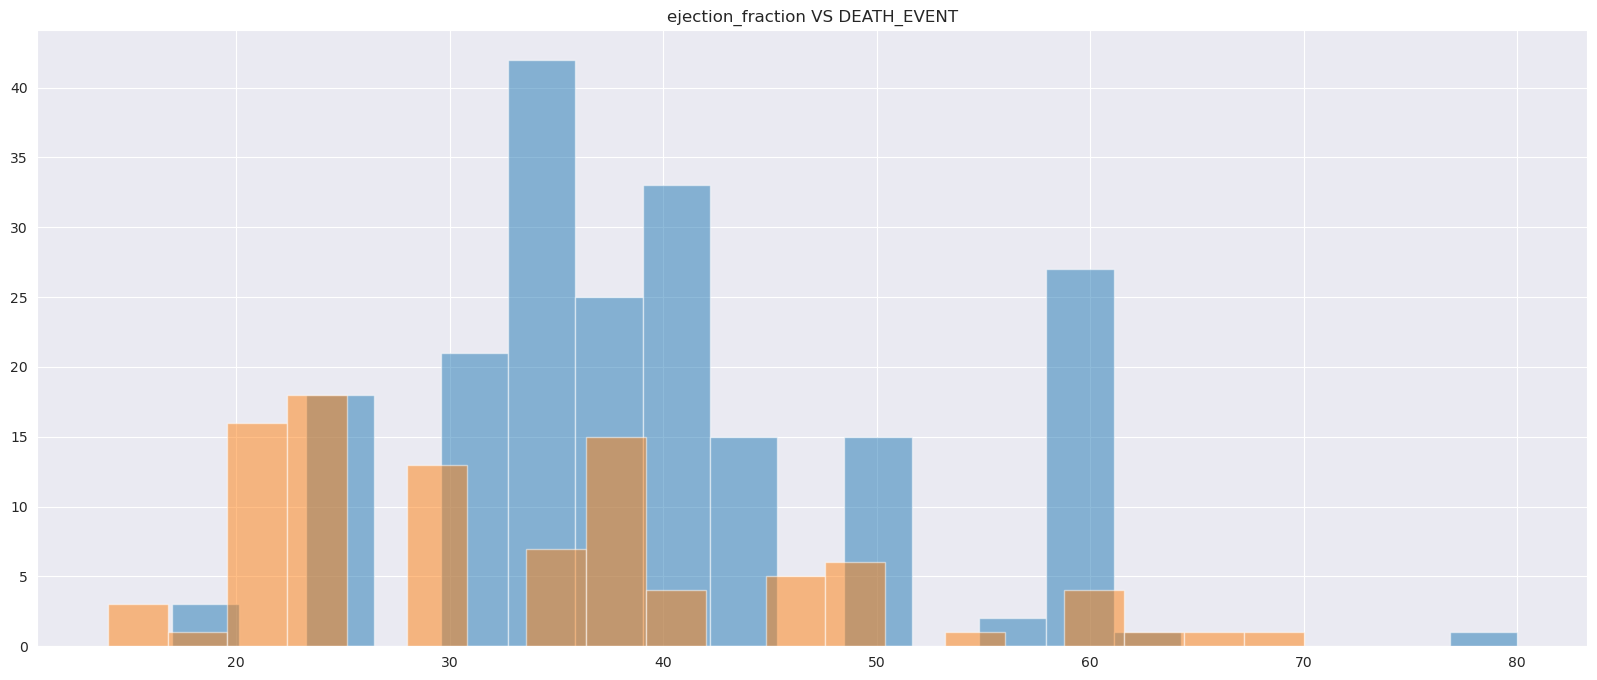

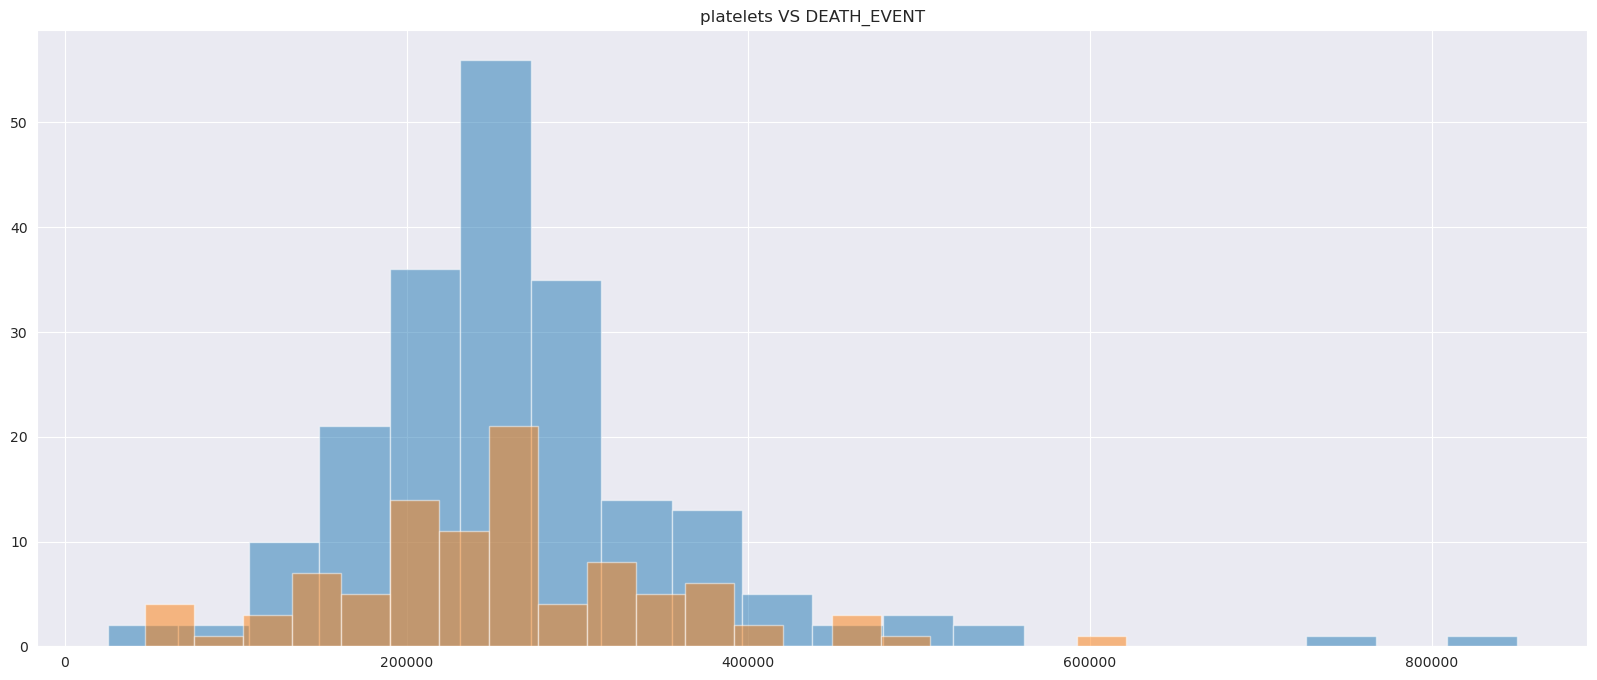

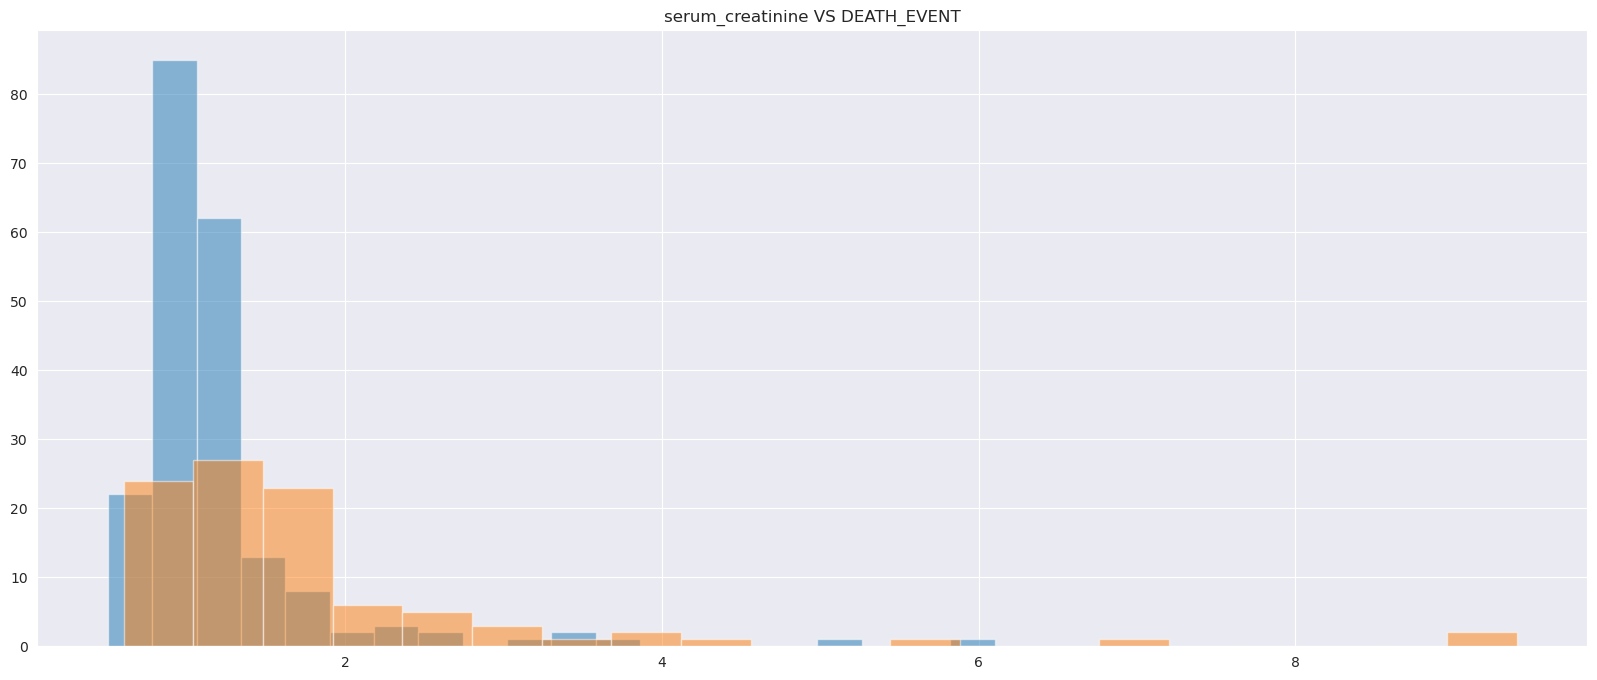

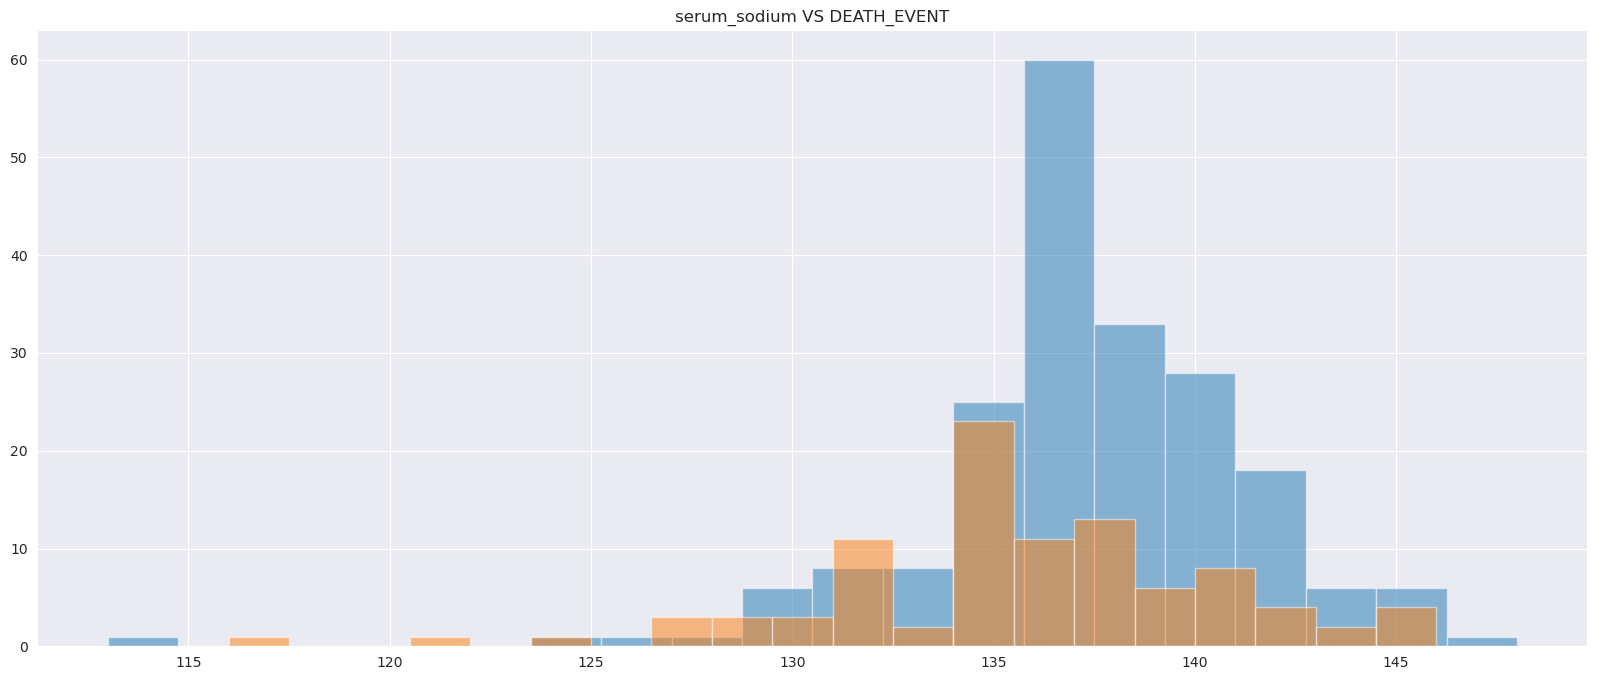

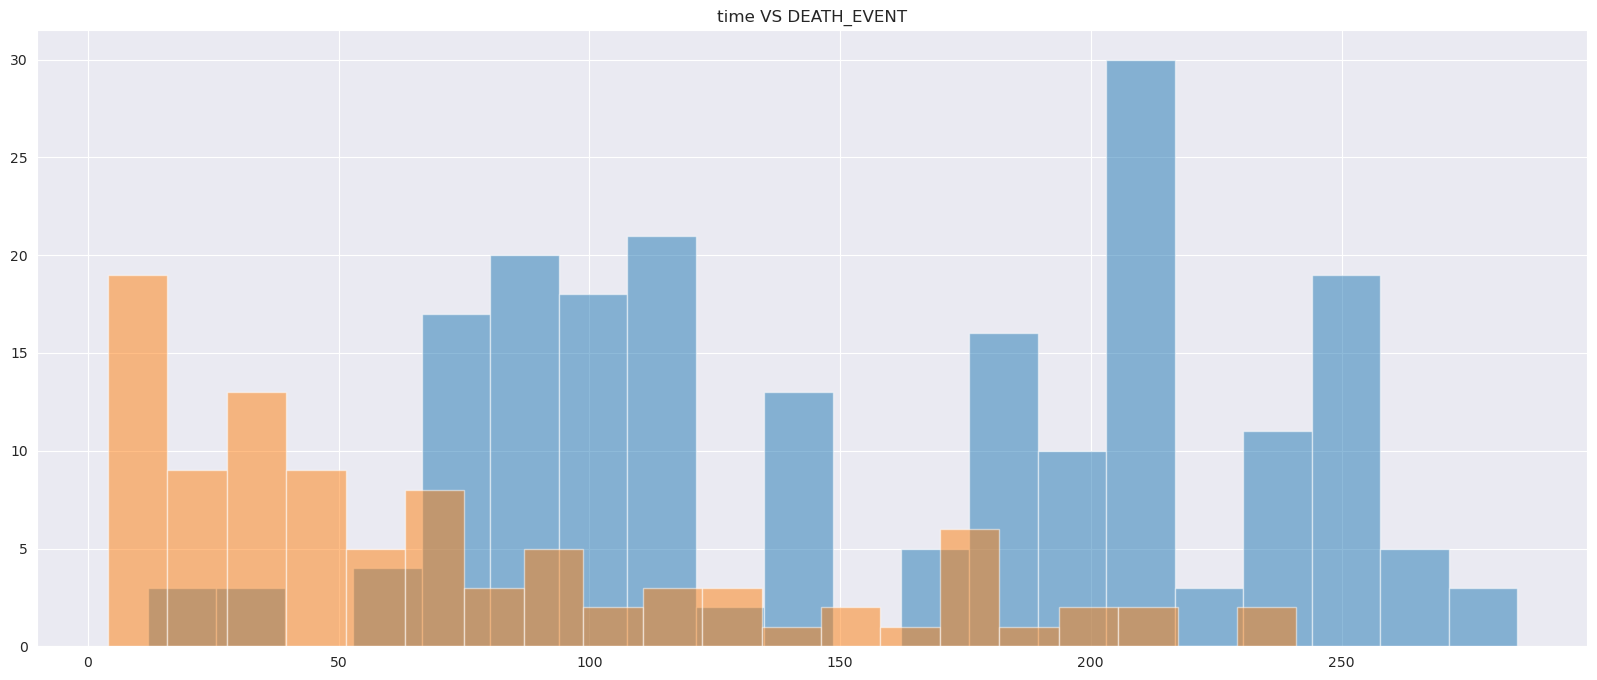

In [206]:
for i in numerical:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=20, alpha=0.5)
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=20, alpha=0.5)
    plt.title(f'{i} VS DEATH_EVENT')
    plt.show()

In [207]:
index = 0
plt.figure(figsize=(5,25))
for feature in numerical:
    index += 1
    plt.subplot(7, 1, index)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df)

**correlation matrix**

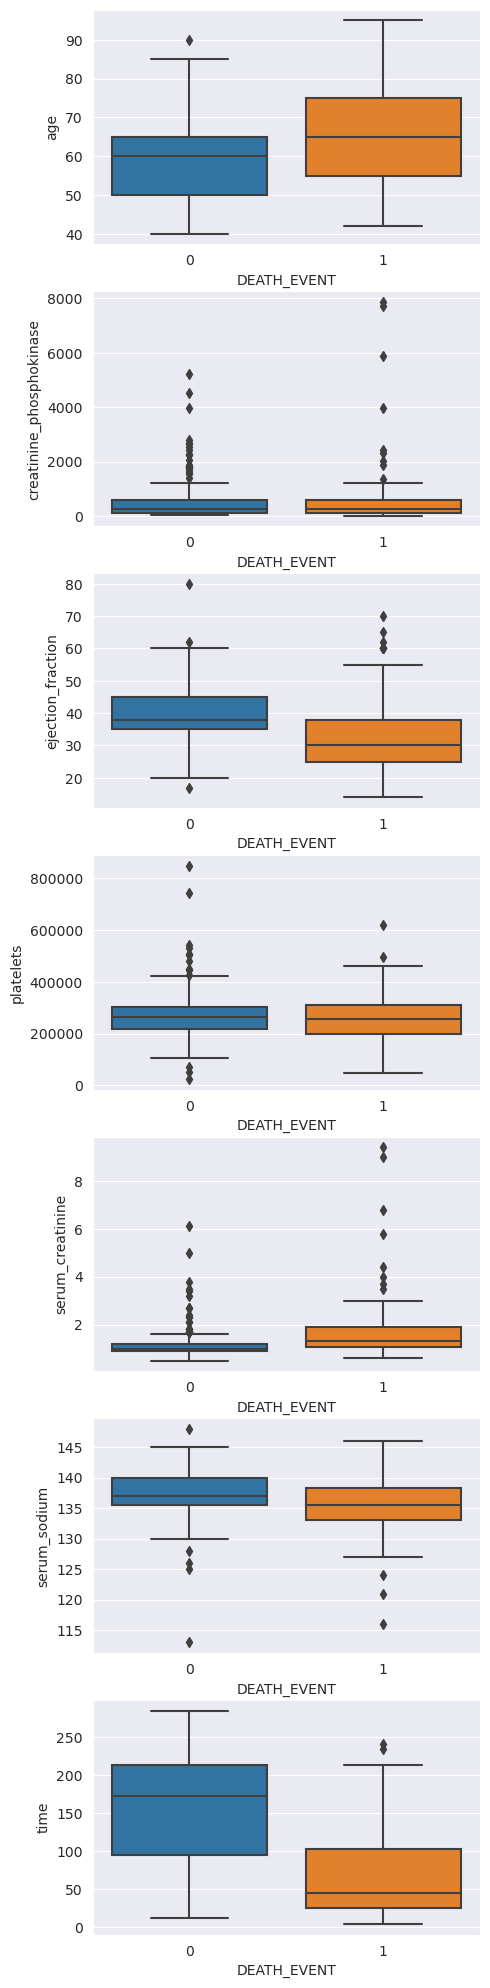

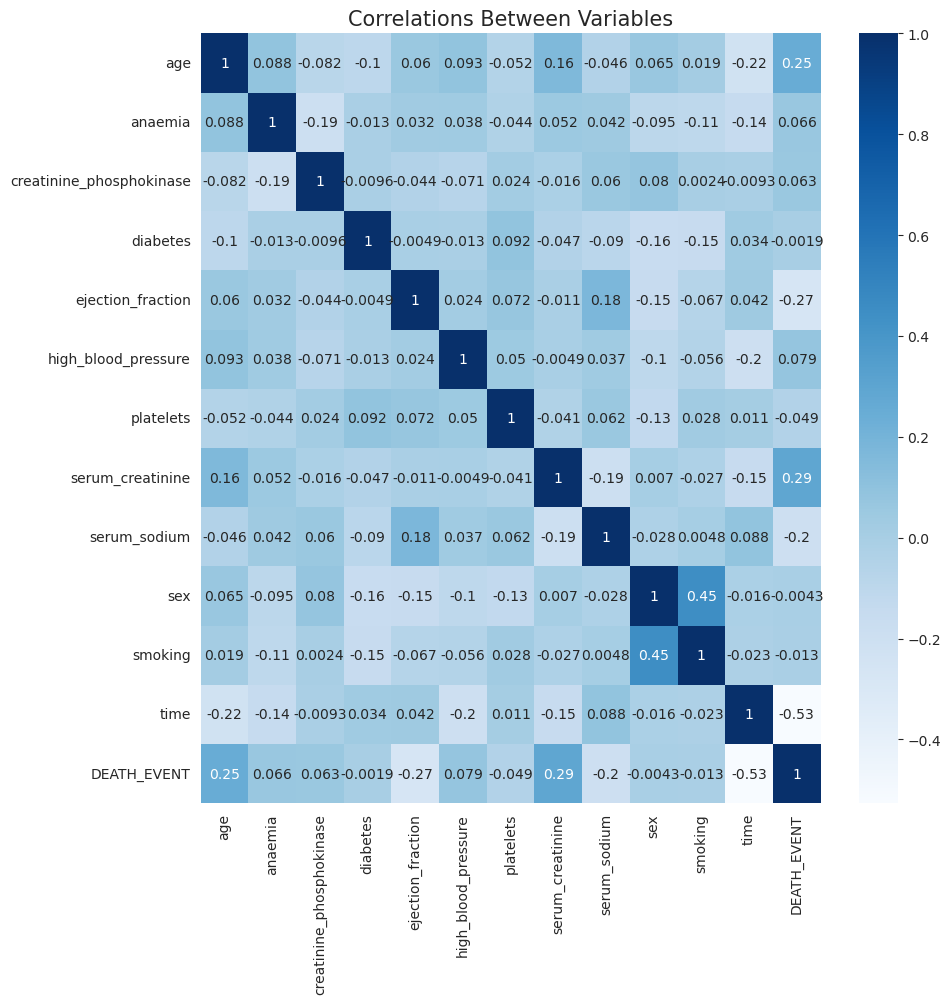

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title("Correlations Between Variables",size=15)
plt.show()

**detecting-multicollinearity**

In [209]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns[:-1]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns[:-1]))]
vif_data

,feature,VIF
0,age,30.400689
1,anaemia,1.910127
2,creatinine_phosphokinase,1.458680
3,diabetes,1.793319
4,ejection_fraction,13.355059
5,high_blood_pressure,1.646768
6,platelets,8.644291
7,serum_creatinine,3.132862
8,serum_sodium,61.551253
9,sex,3.810980


# Machine learning models

**independent and dependent variables**

In [210]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

**Train, Test splitting**

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [212]:
categorical_feature = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [213]:
x_train_categirical = x_train[categorical_feature]
x_train_numerical = x_train.drop(columns=categorical_feature)
x_test_categirical = x_test[categorical_feature]
x_test_numerical = x_test.drop(columns=categorical_feature)

In [214]:
numerical_feature = x_train_numerical.columns

**standardizing data**

In [215]:
sc = StandardScaler()
x_train_numerical = sc.fit_transform(x_train_numerical)
x_test_numerical = sc.transform(x_test_numerical)

In [216]:
x_train = np.concatenate((x_train_numerical, x_train_categirical), axis=1)
x_test = np.concatenate((x_test_numerical, x_test_categirical), axis=1)

In [217]:
accuracy_list= []

In [218]:
features = np.concatenate((numerical_feature, categorical_feature))

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



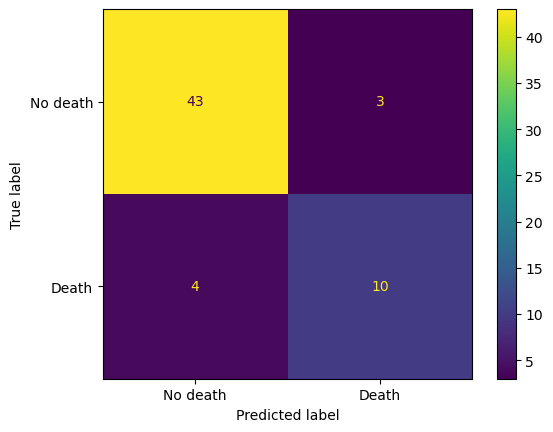

In [219]:
#implementation

log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#evaluation

log_reg_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, y_pred))

# confusion matrix
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()

In [220]:
importance = log_reg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.yticks(np.arange(12), features)

([<matplotlib.axis.YTick at 0x7f8c1f9128b0>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'creatinine_phosphokinase'),
  Text(0, 2, 'ejection_fraction'),
  Text(0, 3, 'platelets'),
  Text(0, 4, 'serum_creatinine'),
  Text(0, 5, 'serum_sodium'),
  Text(0, 6, 'time'),
  Text(0, 7, 'anaemia'),
  Text(0, 8, 'diabetes'),
  Text(0, 9, 'high_blood_pressure'),
  Text(0, 10, 'sex'),
  Text(0, 11, 'smoking')])

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        46
           1       0.75      0.64      0.69        14

    accuracy                           0.87        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.86      0.87      0.86        60



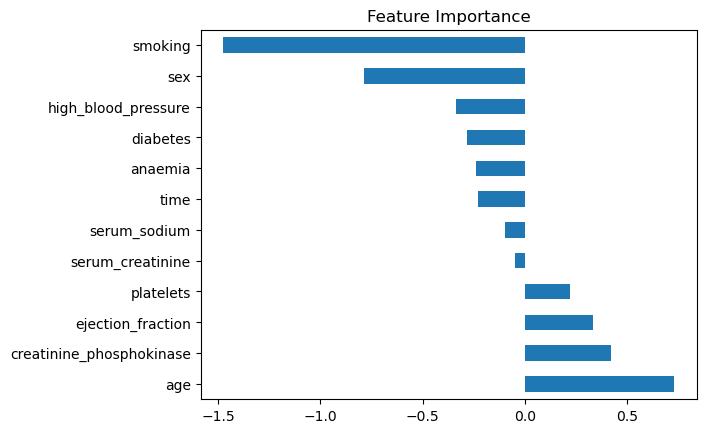

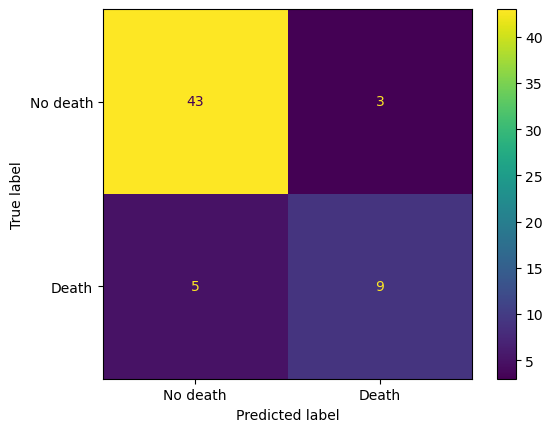

In [221]:
# implementation

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

# evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

# confusion matrix

cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()


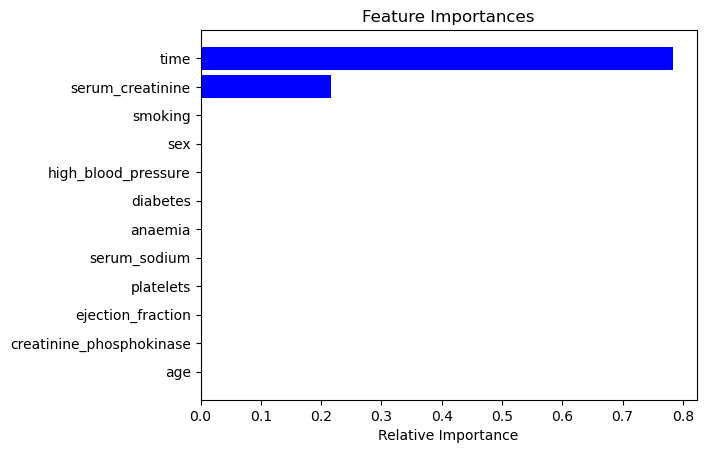

In [222]:
importances = dt_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

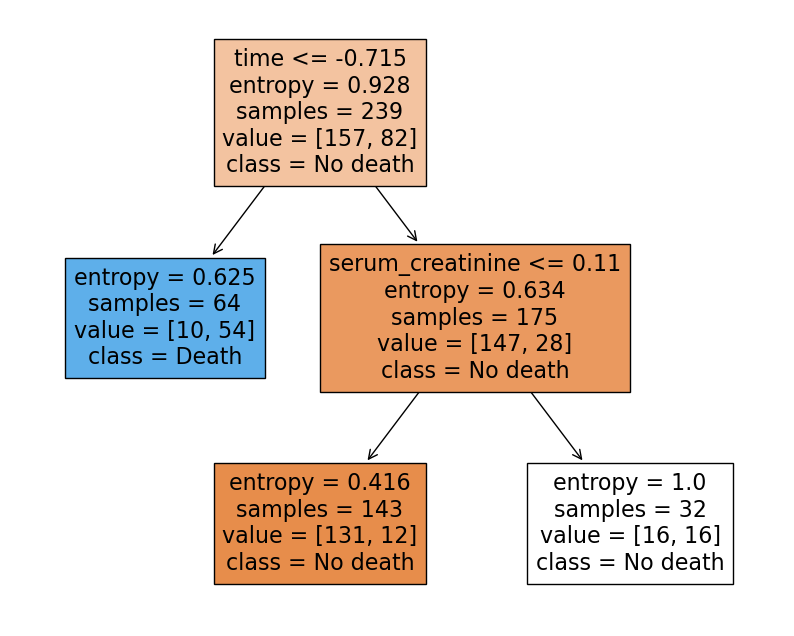

In [223]:
from sklearn import tree
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the decision tree
tree.plot_tree(dt_clf, filled=True, feature_names=features, class_names=['No death', 'Death'])

# Show the plot
plt.show()

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.69      0.64      0.67        14

    accuracy                           0.85        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.85      0.85      0.85        60



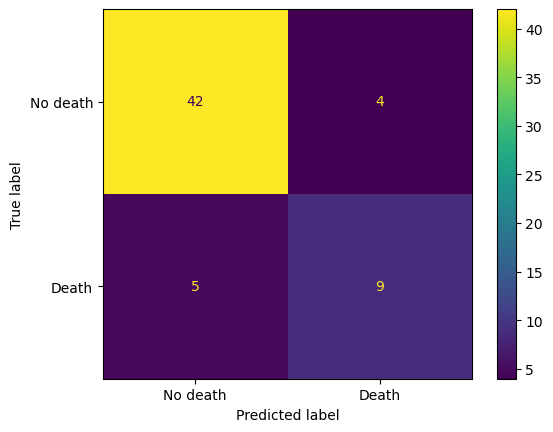

In [224]:
# implementation
r_clf = RandomForestClassifier(max_features=0.5, max_depth=3, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

# evaluation

r_clf_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_clf_acc)
print(classification_report(y_test, r_pred))

# confusion matrix

cm = confusion_matrix(y_test, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()


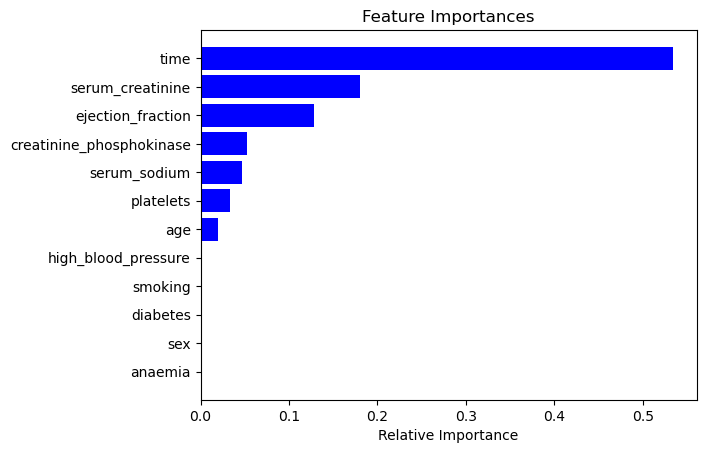

In [225]:
importances = r_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing models

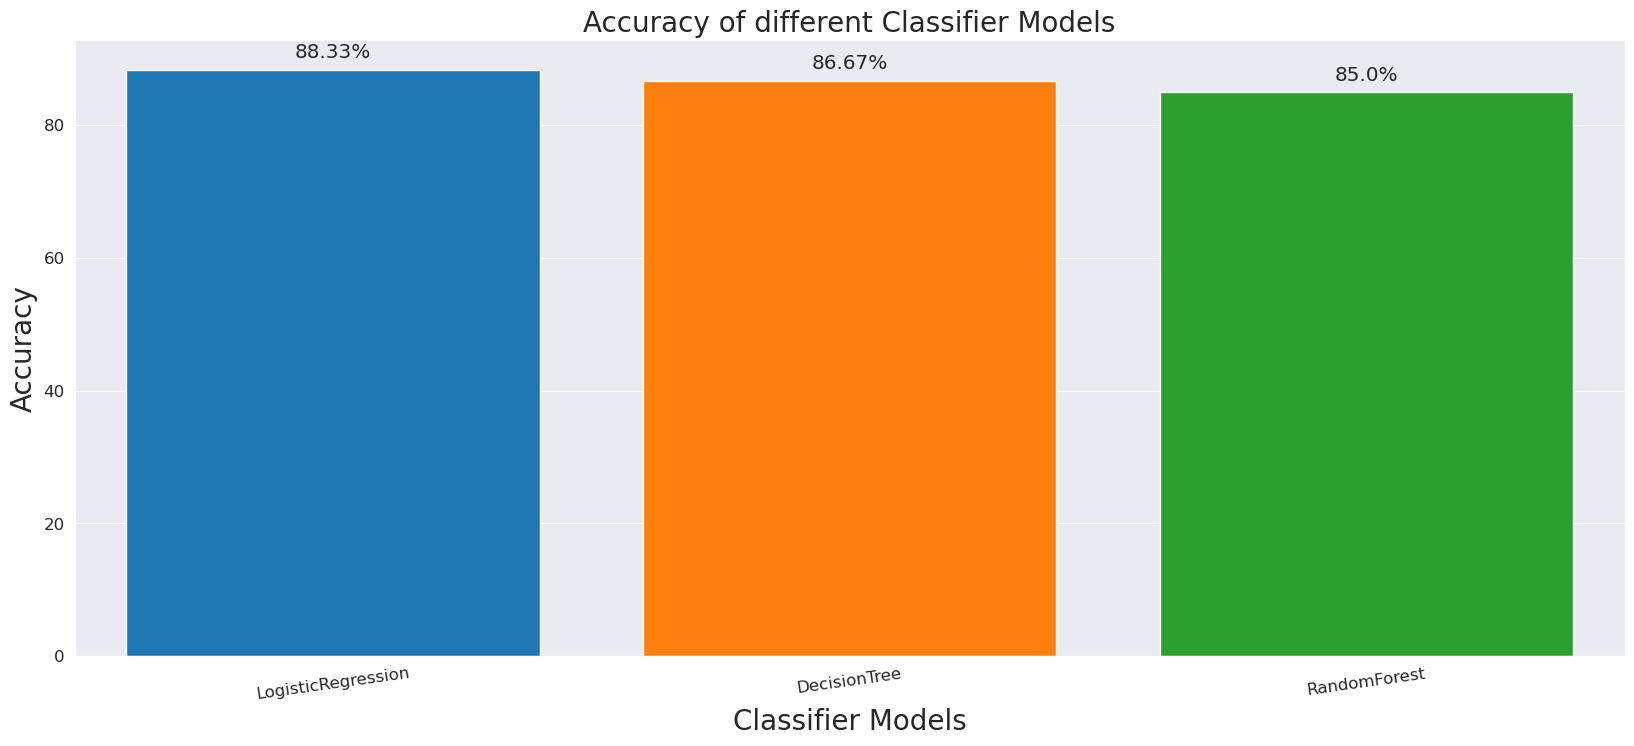

In [226]:
model_list = ['LogisticRegression', 'DecisionTree', 'RandomForest']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

**Bỏ col time**

In [227]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train_categirical = x_train[categorical_feature]
x_train_numerical = x_train.drop(columns=categorical_feature+['time'])
x_test_categirical = x_test[categorical_feature]
x_test_numerical = x_test.drop(columns=categorical_feature+['time'])
numerical_feature = x_train_numerical.columns

**standardizing data**

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_numerical = sc.fit_transform(x_train_numerical)
x_test_numerical = sc.transform(x_test_numerical)
x_train = np.concatenate((x_train_numerical, x_train_categirical), axis=1)
x_test = np.concatenate((x_test_numerical, x_test_categirical), axis=1)

In [229]:
accuracy_list= []
features = np.concatenate((numerical_feature, categorical_feature))

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



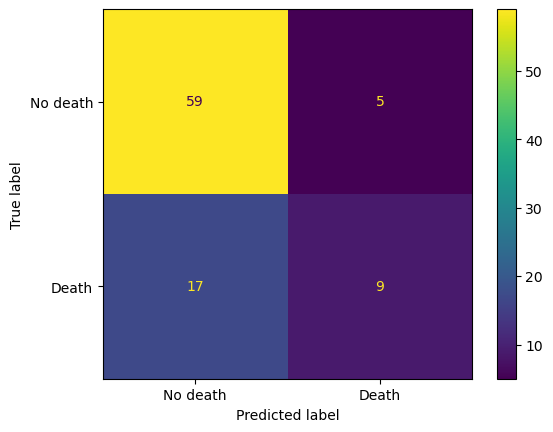

In [230]:
#implementation
log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#evaluation

log_reg_acc = accuracy_score(y_test, y_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, y_pred))

# confusion matrix
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()


In [231]:
importance = log_reg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.yticks(np.arange(11), features)

([<matplotlib.axis.YTick at 0x7f8c0e14d880>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'creatinine_phosphokinase'),
  Text(0, 2, 'ejection_fraction'),
  Text(0, 3, 'platelets'),
  Text(0, 4, 'serum_creatinine'),
  Text(0, 5, 'serum_sodium'),
  Text(0, 6, 'anaemia'),
  Text(0, 7, 'diabetes'),
  Text(0, 8, 'high_blood_pressure'),
  Text(0, 9, 'sex'),
  Text(0, 10, 'smoking')])

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        64
           1       0.62      0.81      0.70        26

    accuracy                           0.80        90
   macro avg       0.76      0.80      0.77        90
weighted avg       0.83      0.80      0.81        90



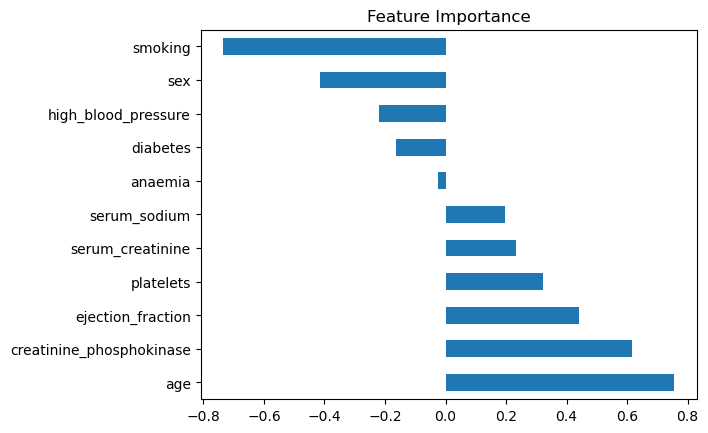

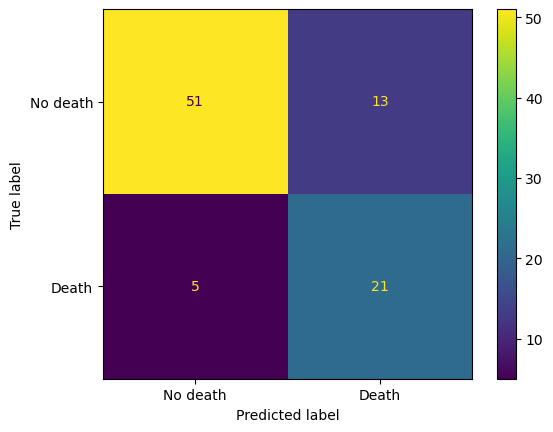

In [232]:
# implementation

dt_clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

# evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

# confusion matrix

cm = confusion_matrix(y_test, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()

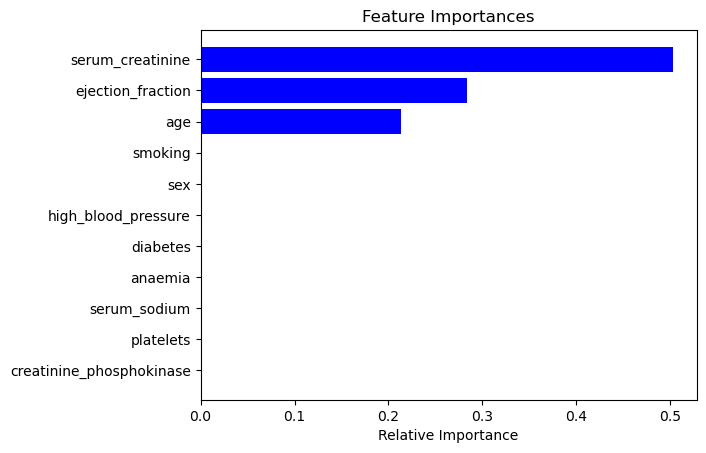

In [233]:
importances = dt_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

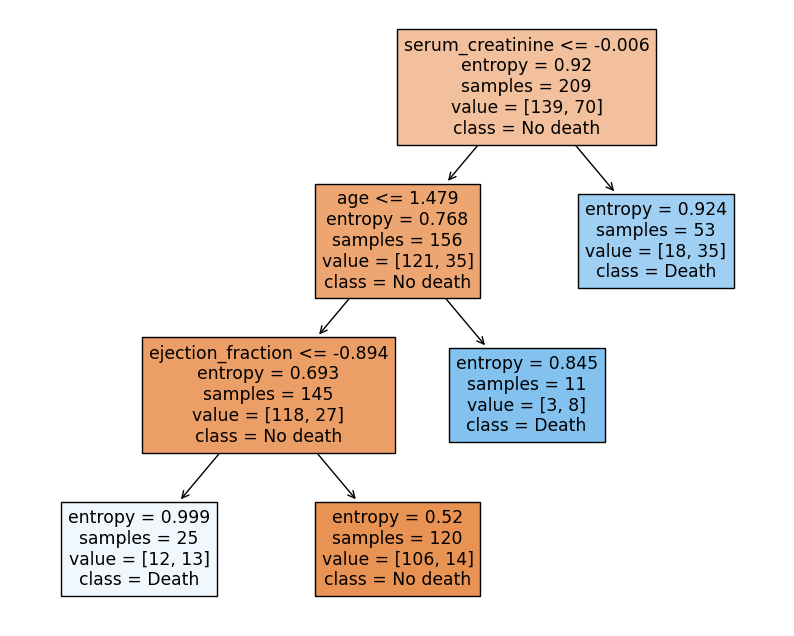

In [234]:
plt.figure(figsize=(10, 8))

# Plot the decision tree
tree.plot_tree(dt_clf, filled=True, feature_names=features, class_names=['No death', 'Death'])

# Show the plot
plt.show()

In [235]:
print('serum_creatinine: -0.006 =>>', -0.006*np.sqrt(sc.var_[4]) + sc.mean_[4])
print('age: 1.479 =>>', 1.479*np.sqrt(sc.var_[0]) + sc.mean_[0])
print('ejection_fraction: -0.894 =>>', -0.894*np.sqrt(sc.var_[2]) + sc.mean_[2])

serum_creatinine: -0.006 =>> 1.4500892292392036
age: 1.479 =>> 79.00299754035458
ejection_fraction: -0.894 =>> 27.505511248200236


**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        64
           1       0.60      0.35      0.44        26

    accuracy                           0.74        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.74      0.72        90



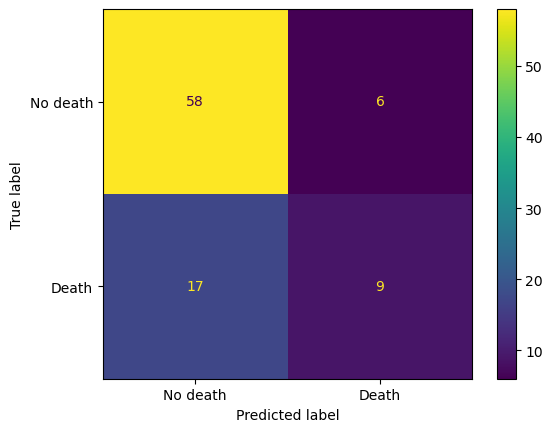

In [236]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=5, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

# evaluation

r_clf_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_clf_acc)
print(classification_report(y_test, r_pred))

# confusion matrix

cm = confusion_matrix(y_test, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()

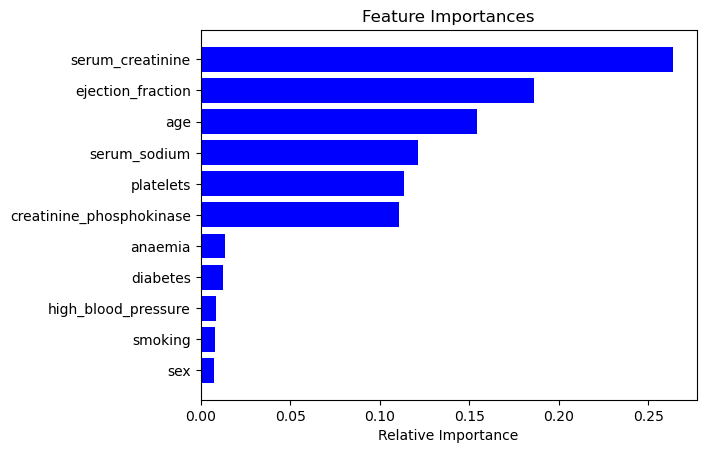

In [237]:
importances = r_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparing models

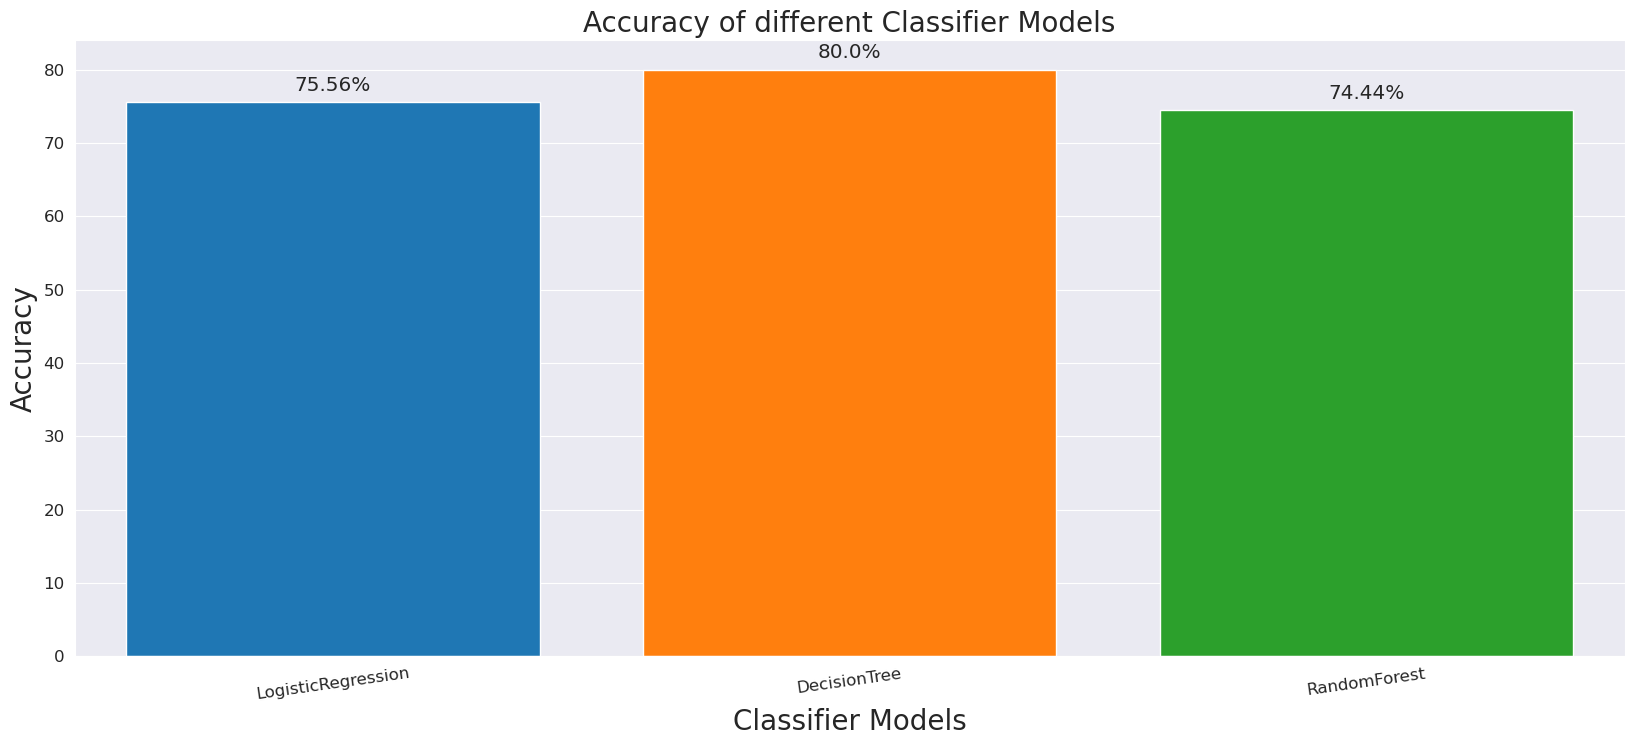

In [238]:
model_list = ['LogisticRegression', 'DecisionTree', 'RandomForest']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [239]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_leaf_nodes': [4,8,16],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_clf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

In [240]:
best_params

{'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        64
           1       0.62      0.81      0.70        26

    accuracy                           0.80        90
   macro avg       0.76      0.80      0.77        90
weighted avg       0.83      0.80      0.81        90



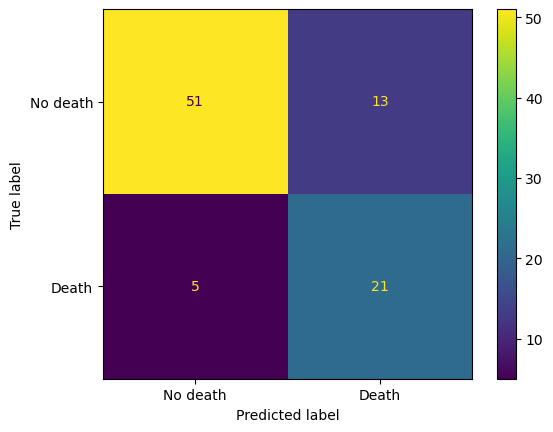

In [243]:
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the test set
dt_pred = best_estimator.predict(x_test)
# evaluation

dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(y_test, dt_pred))

# confusion matrix
cm = confusion_matrix(y_test, dt_pred)
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No death','Death'])
cmd.plot()
plt.show()

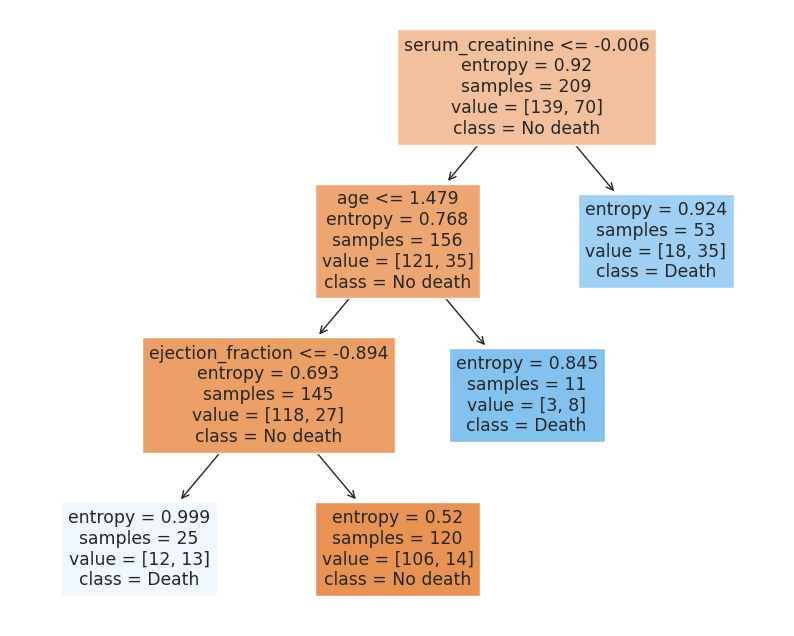

In [242]:
plt.figure(figsize=(10, 8))

# Plot the decision tree
tree.plot_tree(best_estimator, filled=True, feature_names=features, class_names=['No death', 'Death'])

# Show the plot
plt.show()